In [1]:
# core stuff
import numpy as np
import pickle as pk
from copy import deepcopy

# plotting stuff
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
%matplotlib notebook

# Ensure that changes in imported module (gravann most importantly) are autoreloaded
%load_ext autoreload
%autoreload 2


In [46]:
# Load all data (produced using mascon_models.cpp benchmark)
with open("data/bennu_mascon.pk", "rb") as file:
    p_bennu, m_bennu, n_bennu = pk.load(file)
with open("data/bennu_one_year_5000.pk", "rb") as file:
    x_bennu_long = pk.load(file)
with open("data/bennu_one_year_1000_rkf78.pk", "rb") as file:
    x_bennu_long_rkf78 = pk.load(file)
with open("data/bennu_one_week_1000.pk", "rb") as file:
    x_bennu = pk.load(file)

with open("data/itokawa_mascon.pk", "rb") as file:
    p_ito, m_ito, n_ito = pk.load(file)
with open("data/ito_one_year_5000.pk", "rb") as file:
    x_ito_long = pk.load(file)
with open("data/ito_one_year_1000_rkf78.pk", "rb") as file:
    x_ito_long_rkf78 = pk.load(file)
with open("data/ito_one_week_1000.pk", "rb") as file:
    x_ito = pk.load(file)
    
with open("data/67p_mascon.pk", "rb") as file:
    p_67p, m_67p, n_67p = pk.load(file)
with open("data/67p_one_year_5000.pk", "rb") as file:
    x_67p_long = pk.load(file)
with open("data/67p_one_year_1000_rkf78.pk", "rb") as file:
    x_67p_long_rkf78 = pk.load(file)
with open("data/67p_one_week_1000.pk", "rb") as file:
    x_67p = pk.load(file)

In [3]:
with open("data/67p_one_year_5000.pk", "wb") as file:
    pk.dump(x_67p_long, file)

In [4]:
# Getting the inertial coordinates (bennu)
w_bennu = 1.5633255034258877
t_bennu = np.linspace(0,86400. * 7. / 3842.6367987779804,1001)
x_bennu_i =  deepcopy(x_bennu)
x_bennu_i[:,0] = np.cos(t_bennu*w_bennu) * x_bennu[:,0] - np.sin(t_bennu*w_bennu) * x_bennu[:,1]
x_bennu_i[:,1] = + np.sin(t_bennu*w_bennu) * x_bennu[:,0] + np.cos(t_bennu*w_bennu) * x_bennu[:,1]

# Getting the inertial coordinates (itokawa)
w_ito = 0.9830980174940738
t_ito = np.linspace(0,24*60*60.*7/6833.636194780773,1001)
x_ito_i =  deepcopy(x_ito)
x_ito_i[:,0] = np.cos(t_ito*w_ito) * x_ito[:,0] - np.sin(t_ito*w_ito) * x_ito[:,1]
x_ito_i[:,1] = + np.sin(t_ito*w_ito) * x_ito[:,0] + np.cos(t_ito*w_ito) * x_ito[:,1]

# Getting the inertial coordinates (67p)
w_67p = 0.633440278094151
t_67p = np.linspace(0,24*60*60.*7/4500.388359040116,1001)
x_67p_i =  deepcopy(x_67p)
x_67p_i[:,0] = np.cos(t_67p*w_67p) * x_67p[:,0] - np.sin(t_67p*w_67p) * x_67p[:,1]
x_67p_i[:,1] = + np.sin(t_67p*w_67p) * x_67p[:,0] + np.cos(t_67p*w_67p) * x_67p[:,1]


<IPython.core.display.Javascript object>


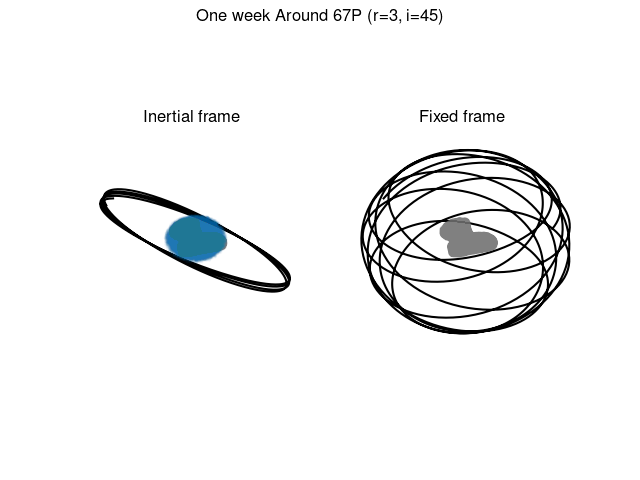

Text(0.5, 0.98, 'One week Around 67P (r=3, i=45)')

In [5]:
D = 2
fig = plt.figure()
p_67p_r = deepcopy(p_67p)
theta = np.random.random((len(p_67p),)) * 2*np.pi


# Plot in inertial frame
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_67p_i[:,0], x_67p_i[:,1], x_67p_i[:,2], 'k')
p_67p_r[:,0] = p_67p[:,0] * np.cos(theta) + p_67p[:,1] * np.sin(theta)
p_67p_r[:,1] = - p_67p[:,0] * np.sin(theta) + p_67p[:,1] * np.cos(theta)
ax.scatter(p_67p[:,0], p_67p[:,1], p_67p[:,2], s=3, alpha=0.03, c='gray')
ax.scatter(p_67p_r[:,0], p_67p_r[:,1], p_67p_r[:,2], s=3, alpha=0.03)
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Inertial frame')
ax.view_init(elev=45., azim=125.)

# Plot in rotating frame
ax = fig.add_subplot(122, projection='3d')
ax.plot(x_67p[:,0], x_67p[:,1], x_67p[:,2], 'k')
ax.scatter(p_67p[:,0], p_67p[:,1], p_67p[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Fixed frame')
ax.view_init(elev=45., azim=125.)

fig.suptitle("One week Around 67P (r=3, i=45)", fontsize=12)

<IPython.core.display.Javascript object>


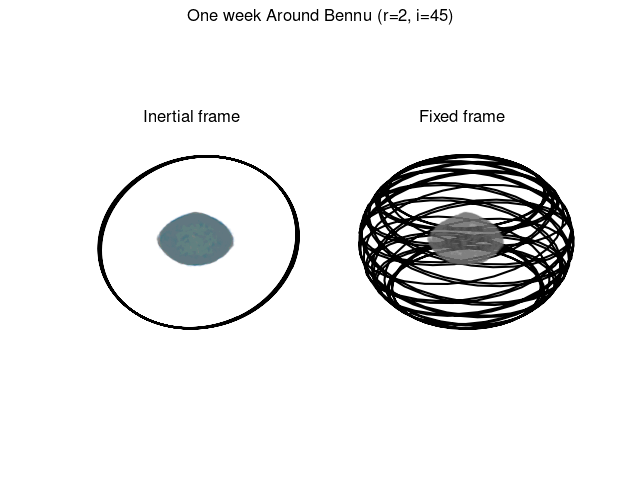

Text(0.5, 0.98, 'One week Around Bennu (r=2, i=45)')

In [6]:
D = 1.3
fig = plt.figure()
p_bennu_r = deepcopy(p_bennu)
theta = np.random.random((len(p_bennu),)) * 2*np.pi

# Plot in inertial frame
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_bennu_i[:,0], x_bennu_i[:,1], x_bennu_i[:,2], 'k')
p_bennu_r[:,0] = p_bennu[:,0] * np.cos(theta) + p_bennu[:,1] * np.sin(theta)
p_bennu_r[:,1] = - p_bennu[:,0] * np.sin(theta) + p_bennu[:,1] * np.cos(theta)
ax.scatter(p_bennu_r[:,0], p_bennu_r[:,1], p_bennu_r[:,2], s=3, alpha=0.03)
ax.scatter(p_bennu[:,0], p_bennu[:,1], p_bennu[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Inertial frame')

# Plot in rotating frame
ax = fig.add_subplot(122, projection='3d')
ax.plot(x_bennu[:,0], x_bennu[:,1], x_bennu[:,2], 'k')
ax.scatter(p_bennu[:,0], p_bennu[:,1], p_bennu[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Fixed frame')


fig.suptitle("One week Around Bennu (r=2, i=45)", fontsize=12)

<IPython.core.display.Javascript object>


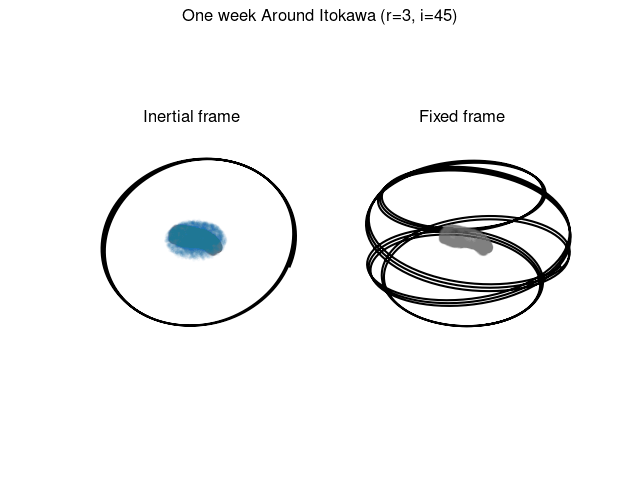

Text(0.5, 0.98, 'One week Around Itokawa (r=3, i=45)')

In [7]:
D = 2
fig = plt.figure()
p_ito_r = deepcopy(p_ito)
theta = np.random.random((len(p_ito),)) * 2*np.pi


# Plot in inertial frame
ax = fig.add_subplot(121, projection='3d')
ax.plot(x_ito_i[:,0], x_ito_i[:,1], x_ito_i[:,2], 'k')
p_ito_r[:,0] = p_ito[:,0] * np.cos(theta) + p_ito[:,1] * np.sin(theta)
p_ito_r[:,1] = - p_ito[:,0] * np.sin(theta) + p_ito[:,1] * np.cos(theta)
ax.scatter(p_ito[:,0], p_ito[:,1], p_ito[:,2], s=3, alpha=0.03, c='gray')
ax.scatter(p_ito_r[:,0], p_ito_r[:,1], p_ito_r[:,2], s=3, alpha=0.03)
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Inertial frame')


# Plot in rotating frame
ax = fig.add_subplot(122, projection='3d')
ax.plot(x_ito[:,0], x_ito[:,1], x_ito[:,2], 'k')
ax.scatter(p_ito[:,0], p_ito[:,1], p_ito[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('Fixed frame')


fig.suptitle("One week Around Itokawa (r=3, i=45)", fontsize=12)

<IPython.core.display.Javascript object>


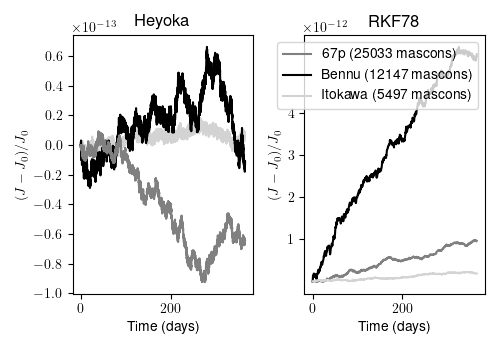

In [112]:
fig, axs = plt.subplots(1,2, figsize=(5,3.5), sharey=False)
axs[0].plot(np.linspace(0, 365.25,5001), x_67p_long[:,-1]-x_67p_long[0,-1], 'lightgray', label = "67p (25033 mascons)")
axs[0].plot(np.linspace(0, 365.25,5001), x_bennu_long[:,-1]-x_bennu_long[0,-1], 'k', label = "Bennu (12147 mascons)")
axs[0].plot(np.linspace(0, 365.25,5001), x_ito_long[:,-1]-x_ito_long[0,-1], 'gray', label = "Itokawa (5497 mascons)")
axs[0].set_xlabel("Time (days)")
axs[0].set_ylabel("$(J-J_0) / J_0$")
axs[0].set_title("Heyoka")


axs[1].plot(np.linspace(0, 365.25,1001), x_ito_long_rkf78[:,-1]-x_ito_long_rkf78[0,-1], 'gray', label = "67p (25033 mascons)")
axs[1].plot(np.linspace(0, 365.25,1001), x_bennu_long_rkf78[:,-1]-x_bennu_long_rkf78[0,-1], 'k', label = "Bennu (12147 mascons)")
axs[1].plot(np.linspace(0, 365.25,1001), x_67p_long_rkf78[:,-1]-x_67p_long_rkf78[0,-1], 'lightgray', label = "Itokawa (5497 mascons)")
axs[1].set_xlabel("Time (days)")
axs[1].set_ylabel("$(J-J_0) / J_0$")
axs[1].legend(loc=1)
axs[1].set_title("RKF78")
axs[1].set_yticks([1.E-12, 2.E-12, 3.E-12, 4.E-12])

plt.tight_layout()
plt.savefig("mascons_err.png", dpi=600)



<IPython.core.display.Javascript object>


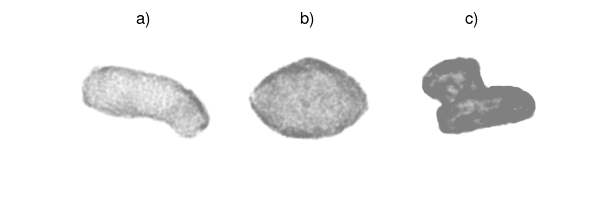

In [9]:
D = 0.5
fig = plt.figure(figsize=(6,2))

# Plot ito
ax = fig.add_subplot(131, projection='3d')
ax.scatter(p_ito[:,0], p_ito[:,1], p_ito[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('a)')

# Plot ito
ax = fig.add_subplot(132, projection='3d')
ax.scatter(p_bennu[:,0], p_bennu[:,1], p_bennu[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('b)')

# Plot ito
D = 0.6
ax = fig.add_subplot(133, projection='3d')
ax.scatter(p_67p[:,0], p_67p[:,1], p_67p[:,2], s=3, alpha=0.03, c='gray')
ax.set_xlim([-D, D])
ax.set_ylim([-D, D])
ax.set_zlim([-D, D])
ax.set_axis_off()
ax.title.set_text('c)')
ax.view_init(elev=45., azim=125.)
plt.savefig("mascons.png", dpi=600)


In [10]:
print(min(m_67p), min(m_ito), min(m_bennu), max(m_67p), max(m_ito), max(m_bennu))

6.842540065530748e-08 6.445547151680327e-07 2.2350333939201627e-07 0.003093158206642883 0.0029530622349880657 0.006221252674026547


In [107]:
x_bennu_long_rkf78 = np.array([[3, 0, 0, 0, -4.281565702652397, 0.408085708581189, -2.0823608647017267],
[0.540943941717241, 2.0517203842342715, 2.1172220143310243, 2.6501856228536225, -0.6942389324222282, -0.004809677801645325, -2.082360864701712],
[-2.5853931768751064, 1.5136742716465088, -0.052669137928511404, 2.1659606178495707, 3.6852253746531813, -0.40846050170492904, -2.0823608647016183],
[-1.4725082653163186, -1.5295673522700017, -2.1157500202417303, -1.9865213592174449, 1.8902387667995648, 0.015524244890236624, -2.0823608647015837],
[1.4676802026297462, -2.613809073812488, 0.10654065646995169, -3.736938654100238, -2.081629358707574, 0.4076368855267088, -2.082360864701638],
[2.037186276488199, 0.6070694608594221, 2.1133013959089895, 0.8083132873538554, -2.6252624440210828, -0.02535997955642873, -2.0823608647016036],
[0.0536787820175749, 2.9920137743137256, -0.1591798474912783, 4.267673807202353, -0.09826981133161669, -0.40738941690777913, -2.0823608647015934],
[-2.07861667102205, 0.4646579890681491, -2.1090469224209993, 0.56575556634131, 2.6960012856639533, 0.036010467506334666, -2.082360864701607],
[-1.5570432195681412, -2.554470487289327, 0.21285331112589537, -3.6286735880288803, 2.2456526660881173, 0.40615363897616247, -2.0823608647015384],
[1.584859246119529, -1.430452822706246, 2.1039777768354067, -1.8183251389289836, -2.081755036364732, -0.04592970371387851, -2.0823608647015672],
[2.6285663070206393, 1.4152870819950047, -0.2652754176387395, 1.9862920181680328, -3.7649832439556934, -0.4052841138764976, -2.0823608647015828],
[-0.6857812937889857, 2.0290245851783326, -2.0969971257602396, 2.61227299186866, 0.941451426114873, 0.0563853835192348, -2.0823608647015472],
[-2.9799489113389845, 0.10570527348055012, 0.3186444409494391, 0.19382932256741356, 4.2464541120593875, 0.40359912072661114, -2.082360864701588],
[-0.4018310069594744, -2.111440484198013, 2.089271512129795, -2.752834068089613, 0.4584365158226708, -0.06630985088491989, -2.082360864701601],
[2.512499940048223, -1.5921797723532378, -0.3706717971277451, -2.310983189975356, -3.5530496182589215, -0.4021241060473829, -2.0823608647015863],
[1.3904681230539504, 1.6510747018885008, -2.0796825343583025, 2.1946195779904576, -1.7515130901897211, 0.07655392758271355, -2.082360864701608],
[-1.3622031902112175, 2.6372796086194303, 0.42362773305511037, 3.782400586260928, 1.8893088756796224, 0.40002037714893857, -2.0823608647015757],
[-2.0319257531141406, -0.7579194133726768, 2.069267892742252, -1.0647516465244846, 2.6183384931407065, -0.0865133165643789, -2.082360864701556],
[-0.15525100497451844, -2.95591628061266, -0.4750959128581413, -4.204283371124915, 0.28482036285088097, -0.3979602528199175, -2.082360864701606],
[2.1534595724960814, -0.33914101058092594, -2.0571352312641156, -0.35263022523994453, -2.825542247034453, 0.09661754798131764, -2.0823608647015983],
[1.620765107465392, 2.4663035567489584, 0.5275607880406329, 3.4698019953337518, -2.364846483908882, 0.3954595302333997, -2.082360864701579],
[-1.7185570602319595, 1.361712599230646, 2.0439858384614458, 1.7038301318157831, 2.310397931522679, -0.10654602036213863, -2.0823608647015845],
[-2.6358086322926253, -1.3068180924029562, -0.5782937207603801, -1.7887784015418307, 3.781802098719168, -0.39279451863118586, -2.082360864701613],
[0.8305799102475617, -2.0433479321382686, -2.0293703152813096, -2.6394432064859163, -1.188460078189679, 0.11641081996974509, -2.0823608647016427],
[2.923782327411031, -0.19999873268604235, 0.6301812960300288, -0.3678109097630378, -4.147994388836989, 0.3898593266365539, -2.082360864701627],
[0.28335757716188453, 2.2027109417750443, 2.013495492942472, 2.9109367169964036, -0.2588102685182487, -0.12624642909682612, -2.0823608647016716],
[-2.4148658293201453, 1.6425172424561354, -0.679987869681587, 2.406408265702764, 3.3776024472496915, -0.38661135814533865, -2.08236086470159],
[-1.3421894820025644, -1.78750990553097, -1.9965179450963293, -2.4289434405327737, 1.6721210344533348, 0.135852191965038, -2.082360864701556],
[1.2521633037388271, -2.623079967031503, 0.7312129225521077, -3.761848486422508, -1.6888439030609783, 0.38328277306331127, -2.0823608647015757],
[2.0640028140855113, 0.9030070262132863, 1.9779212155629644, 1.3111873452339375, -2.6770284732962253, -0.14561084759729717, -2.082360864701551],
[0.24142866724755177, 2.885660061631844, -0.7799325444114034, 4.080986265924317, -0.44420383514681144, -0.37949328807264765, -2.0823608647015384],
[-2.255859899267013, 0.23818837277338065, -1.9586419203796301, 0.18265777485996315, 3.003525273514132, 0.15505102498369633, -2.0823608647015464],
[-1.6520390760477313, -2.358386167704738, 0.830434631397384, -3.276221943980626, 2.4272455856588295, 0.3757646434617324, -2.0823608647015117],
[1.8624050281454891, -1.3294490853849452, 1.9373057442693762, -1.6534390200027973, -2.556972230808787, -0.16469341538027987, -2.082360864701484],
[2.6055779153371748, 1.1982508399884029, -0.8779080665174899, 1.5912654861199704, -3.7327930675467433, -0.37143312159104663, -2.082360864701485],
[-0.9643903419953369, 2.092942607120487, -1.9157856253244043, 2.7286385357387912, 1.4161748813239896, 0.17386234396124972, -2.0823608647014513],
[-2.836194245847482, 0.27290028147466794, 0.9275714472539425, 0.5043858080305169, 3.994405287948525, 0.3672128347936302, -2.082360864701461],
[-0.1939967379638322, -2.318241495350326, 1.8917394077107448, -3.1117373123934358, 0.11035154719041074, -0.1832853288970502, -2.0823608647014558],
[2.30168666857163, -1.658782052473147, -0.9736368563263909, -2.4418681707617664, -3.1750093232527203, -0.36237914569487567, -2.0823608647015224],
[1.3305907339961733, 1.9284960646160492, -1.868105469312736, 2.671266510434991, -1.6572400233766085, 0.19216108675114668, -2.0823608647014975],
[-1.1486138868939286, 2.5714395399786247, 1.0223326620871767, 3.6756715467102468, 1.4997010256152146, 0.3577206238332521, -2.082360864701495],
[-2.1301462874572628, -1.031517282202805, 1.8413889211096486, -1.5285067578637932, 2.7956095481341627, -0.20139073937538993, -2.0823608647014673],
[-0.3029988535068886, -2.787255611324754, -1.0668794369752523, -3.9083426120204625, 0.5601217310287483, -0.35247140433096585, -2.0823608647014797],
[2.377525333255576, -0.16877351706991642, -1.815723661508643, -0.06819320733344393, -3.2153829656592077, 0.21006278554858446, -2.0823608647014806],
[1.6465588968570386, 2.24089464277136, 1.114510850106021, 3.0658187786909803, -2.4252235480665374, 0.34737838257058895, -2.0823608647014193],
[-2.0051891317198995, 1.335025662862487, 1.7863482884943316, 1.6694737794008487, 2.8017299531057147, -0.2190436644946731, -2.0823608647014415],
[-2.5396554482919727, -1.10048750072239, -1.157428163379023, -1.4129711275577626, 3.621075470536879, -0.3416655558763687, -2.0823608647014105],
[1.077423566783464, -2.173063453010183, -1.7587171884583366, -2.8715193213143504, -1.6073044837906763, 0.22743471723191508, -2.0823608647014114],
[2.7246906235309942, -0.31631931532347, 1.2038754364814674, -0.5893030987655432, -3.7988948692591724, 0.33608726366288194, -2.082360864701383],
[0.13952412739133058, 2.4484648275512924, 1.7267562807820118, 3.33838970927034, -0.023030002202637793, -0.23607694084233807, -2.08236086470139],
[-2.183649839228521, 1.6381577829519063, -1.2450113841728634, 2.4124318122294963, 2.9640767463794657, -0.32994670724231145, -2.082360864701349],
[-1.355347078356144, -2.0631529148382213, -1.697282508797228, -2.902459027551863, 1.7063170626074837, 0.24416790803239424, -2.0823608647013305],
[1.0619855522500417, -2.48579943009644, 1.290161226929259, -3.5299114573920973, -1.3401700167110269, 0.32394664609260043, -2.0823608647013563],
[2.22415949284819, 1.1343535288996873, 1.6628187692705938, 1.7009169422750372, -2.963127903618105, -0.25247606848299714, -2.082360864701333],
[0.33302683021465984, 2.669207463000659, -1.329420395081023, 3.701290389220166, -0.6205370769683682, -0.3174723157568477, -2.082360864701296],
[-2.508433968077413, 0.1350754409396109, -1.631563686478362, 0.016547957145753023, 3.443524798998007, 0.26038449558990157, -2.082360864701262],
[-1.6030887478024194, -2.1247084992547904, 1.3732000784161753, -2.857679563813944, 2.3566601028135294, 0.3110409437598118, -2.0823608647012817],
[2.1361219802419673, -1.3766681406555155, 1.5946615317623842, -1.7488225181098462, -3.0258119707412554, -0.26831756468885865, -2.082360864701286],
[2.442802092900455, 1.0233198537360557, -1.4104943567616144, 1.2709716442454113, -3.455048775940637, -0.3042163266493253, -2.082360864701296],
[-1.1617341451730363, 2.2763569969586293, -1.5616686727143958, 3.055225963744729, 1.7479198718554319, 0.2759594267642013, -2.082360864701328],
[-2.598627975734742, 0.32458232951105787, 1.4527698998338077, 0.6126070244324002, 3.5778546460471268, 0.29725720158011537, -2.082360864701303],
[-0.122854160104016, -2.582775465300178, 1.5224455189423682, -3.5723154492423745, 0.0020672768978312658, -0.2834033662221307, -2.082360864701289],
[2.0715887159033888, -1.5808468085375373, -1.4879879032148984, -2.3185008498288315, -2.7637452881695057, -0.2901281115835209, -2.0823608647012444],
[1.4130696640269451, 2.1811897851516218, -1.487817600773626, 3.104426850536563, -1.8134618825712452, 0.2907585402986264, -2.0823608647012515],
[-1.0013727328905044, 2.3723867216923145, 1.5286166762680626, 3.335461784413591, 1.2263141032808151, 0.28270842129459817, -2.082360864701239],
[-2.3374768594379325, -1.2043800906452666, 1.4464029772024622, -1.8157578825070848, 3.1646019086630215, -0.2977544978923796, -2.0823608647012213],
[-0.3271646996380201, -2.541486811369086, -1.5617176389454601, -3.477326942871225, 0.6177611625174833, -0.2753988051092436, -2.082360864701215],
[2.6377762068786326, -0.13827397082174223, -1.4102104390870485, -0.02990022249955587, -3.6689655102148704, 0.3049004441504154, -2.0823608647011955],
[1.52362841796869, 2.0207730535746053, 1.6005829317391558, 2.671109164049314, -2.224933435993886, 0.2675094323874772, -2.08236086470113],
[-2.2451106177495532, 1.4494241274960658, 1.3666875958294715, 1.882750604278984, 3.211448425490529, -0.31141674459878227, -2.082360864701121],
[-2.322391406978559, -0.9748584897354904, -1.6315353893262443, -1.179571497035242, 3.2476459697835844, -0.25995675091523374, -2.0823608647011245],
[1.2117720734978499, -2.393414215725452, -1.328986596857498, -3.2632202951742943, -1.8281986801487087, 0.31828540167860936, -2.082360864701137],
[2.468903251366663, -0.29506774149951726, 1.6684884173915748, -0.5695989282560534, -3.350484016648053, 0.25155165385900363, -2.082360864701071],
[0.14358259448986696, 2.709983033323099, 1.2834970210365282, 3.7938275675877424, -0.04660437973303702, -0.3242266822301982, -2.082360864701055],
[-1.9759809638572545, 1.490300584651471, -1.6972069395950975, 2.166131846315867, 2.592471133125782, -0.2437942424017403, -2.0823608647010596],
[-1.4974660542279268, -2.2736691111418903, -1.244393786616041, -3.2614742814966853, 1.9676273342038906, 0.33080370356874017, -2.0823608647010463],
[0.9735875488709591, -2.240045743690728, 1.7321049902782142, -3.1078871023083035, -1.1700618199310036, 0.2349453412783409, -2.0823608647010046],
[2.459852030942952, 1.2374457449049538, 1.197096445738287, 1.8659196522760508, -3.3819454253423564, -0.336177020528729, -2.0823608647010188],
[0.28429337502918434, 2.415046570426226, -1.7585751676360213, 3.2556949492698593, -0.5499169525873976, -0.2271029309430034, -2.0823608647010508],
[-2.7548252825347044, 0.17633112907918994, -1.1566424036950318, 0.10464801091171536, 3.8728732414394424, 0.34256667572239563, -2.0823608647010703],
[-1.413359557973482, -1.9388415080199382, 1.791322338060357, -2.5231753264156076, 2.0392459630060618, 0.2178185122925743, -2.082360864701082],
[2.3242211330637597, -1.5457747274469005, 1.1076783746941343, -2.058026523491534, -3.3447824200301373, -0.3473395405456095, -2.082360864701079],
[2.187849839205684, 0.9606061770812132, -1.8155424659690689, 1.148312504217077, -3.0154576239506894, -0.2098546902895118, -2.08236086470112],
[-1.2249491247345672, 2.513645982577, -1.0659029380026133, 3.4769671898279704, 1.8435861756087224, 0.35347691557116884, -2.082360864701111],
[-2.3464266905406954, 0.22839544911503762, 1.8459966697496777, 0.46141701555874864, 3.135875361727762, 0.20006904152966912, -2.082360864701057],
[-0.1981872622721781, -2.81974629559745, 1.015464995741476, -3.9848040977384542, 0.1505150166214886, -0.3575523824282937, -2.082360864701016],
[1.9056646032411524, -1.3727236691414133, -1.867921422479487, -1.9662891363841364, -2.4656530290919907, -0.1920079189803721, -2.0823608647010197],
[1.5999503766578707, 2.3338223029823415, -0.9724370587963967, 3.361660393881589, -2.153804701024186, 0.3634249448094932, -2.0823608647009983],
[-0.9826561778437817, 2.0989571694380853, 1.895942028107645, 2.8649954677360796, 1.1785722783604407, 0.1818005732013166, -2.082360864701009],
[-2.5803319408016465, -1.2324077357510357, 0.9207257887847494, -1.8492859921807348, 3.595995073786951, -0.3668631666136095, -2.0823608647009726],
[-0.20632187918759706, -2.3004646771823243, -1.9155944322075487, -3.0549277806244737, 0.42037636882797624, -0.17377246681502614, -2.082360864700922],
[2.8498369132738817, -0.2442112675608612, -0.8764987260317567, -0.23203296620419123, -4.038121397332787, 0.37250668554129535, -2.0823608647009397],
[1.2799540728923198, 1.8869142396109624, 1.941064765099117, 2.4280379034486383, -1.8129038617446482, 0.16314115744772073, -2.0823608647009113],
[-2.3678281642392713, 1.656131815297207, 0.8236595464847467, 2.257810276934637, 3.4159086829003833, -0.3753040364331307, -2.0823608647009273],
[-2.0496314551025883, -0.9832435516878238, -1.9584872434013916, -1.1819296305880111, 2.776823151024723, -0.1550825216566282, -2.08236086470089],
[1.2018447274560158, -2.626072730286937, -0.7782866791679126, -3.677134556850978, -1.7950759184781482, 0.38065936226641583, -2.0823608647009237],
[2.241800578398288, -0.1283243875369652, 1.9812583305543516, -0.2945343563512519, -2.952737852032953, 0.1439981484637032, -2.0823608647009237],
[0.2802143945738903, 2.9029917122578985, 0.7245064881060139, 4.12929593329812, -0.3023938947635947, -0.3827453764634281, -2.082360864700906],
[-1.8674612219215285, 1.2366038971294615, -1.9964313858872147, 1.7338597891203895, 2.395334901070312, -0.13592357774718278, -2.0823608647009033],
[-1.7103032558248321, -2.35768523463828, -0.6780773348406942, -3.3980536395433276, 2.3540067005322545, 0.38779841892615874, -2.082360864700904],
[1.029446938271572, -1.960383447121269, 2.0163565032287076, -2.6266283466759957, -1.2533536476724794, 0.12446161173299417, -2.0823608647008864],
[2.6880579356569494, 1.191475916781684, 0.6235589688693662, 1.7698681099454197, -3.7876151049235633, -0.3891947369042272, -2.082360864700874],
[0.09824712242361013, 2.207496073794268, -2.0293277270672356, 2.8921874838489625, -0.23794419614467308, -0.1164929746629229, -2.082360864700928],
[-2.915002545095627, 0.3342631287344712, -0.5761327618354816, 0.3985829555675403, 4.1509946235266515, 0.39399149481446977, -2.082360864700947],
[-1.133279746465975, -1.8703061727523627, 2.0463100382599357, -2.3949620390054553, 1.5633659702611897, 0.10469606277913768, -2.082360864700993],
[2.3735333456370173, -1.7697755338714631, 0.5210606795608292, -2.463245446488217, -3.4206675355323632, -0.39469002185101365, -2.0823608647010072],
[1.9186616224127004, 1.042190497362823, -2.0571470223461765, 1.2793194271541393, -2.5509684489493867, -0.09678474705698303, -2.082360864701036],
[-1.1461683665750322, 2.7204260363757924, -0.4726814027572943, 3.8457484360012866, 1.689145183703898, 0.3991910474211624, -2.0823608647010836],
[-2.163796798610556, 0.0015893142565186315, 2.0710668437008515, 0.08086523830231349, 2.81638728899398, 0.08462550127950728, -2.082360864701049],
[-0.380935755065464, -2.9531381946525865, 0.4172757629647456, -4.215777451747074, 0.4869067233247197, -0.399144220101489, -2.0823608647010463],
[1.8652752530348298, -1.0920602670299164, -2.079776360048184, -1.4866886978658356, -2.388259441746538, -0.07675191750187402, -2.0823608647009766],
[1.817596728059046, 2.3443240473853635, -0.36799648314906847, 3.368940138209236, -2.549103567640844, 0.40334163704888254, -2.0823608647009504],
[-1.1115327836779139, 1.835035466719516, 2.0905248039298545, 2.411497435417456, 1.3901871185004295, 0.06432700703552928, -2.082360864700931],
[-2.7734066536949697, -1.1198103765356942, 0.3124822423662759, -1.636665302789014, 3.9399599797107916, -0.40260771189623534, -2.0823608647009273],
[0.03241586628035666, -2.1438051923764574, -2.097162795052474, -2.780875825340169, 0.015875258631467614, -0.056607143474198096, -2.0823608647009175],
[2.944916022435048, -0.4368912962861816, -0.2623576292570146, -0.5874939315455283, -4.201980826526395, 0.4064843902047738, -2.0823608647008793],
[0.984120941484546, 1.8913640148852604, 2.1046632216432775, 2.4281499140228964, -1.3093910543663045, 0.04394011825396688, -2.0823608647008616],
[-2.341994694561161, 1.87575868728095, 0.20691613711137724, 2.6551308211891342, 3.36020898632569, -0.40508714649583816, -2.082360864700835],
[-1.8050026720833598, -1.1338290830228304, -2.10931608781691, -1.4341316937779014, 2.3555414530909227, -0.03631521963521025, -2.0823608647008314],
[1.0644668709654412, -2.787811486314286, -0.1560106222733916, -3.9671118035888657, -1.5373295560354068, 0.4086086231600348, -2.0823608647008474],
[2.1191670036335686, 0.14290176163025808, 2.1134661703386, 0.16410022172419125, -2.7387629592600047, 0.02339868788636758, -2.0823608647008722],
[0.4900811923029263, 2.966213605549816, 0.10083438242568246, 4.237267921653406, -0.6860471696541817, -0.40652768905054226, -2.0823608647008793],
[-1.900042927589625, 0.9497804610793212, -2.1161518610475873, 1.2435153050002965, 2.446133341090808, -0.015837717431944957, -2.082360864700854],
[-1.9110746100006113, -2.2961123184644943, -0.04923130686947874, -3.2785511440489947, 2.720128151927924, 0.40966630614316324, -2.082360864700796],
[1.223507201783668, -1.7328326920180608, 2.116846840145628, -2.237092866268597, -1.5796032692956765, 0.002752266438931265, -2.0823608647007865],
[2.8285135616893213, 1.0251823772040394, -0.005482083190473315, 1.4633764729287726, -4.039196009160959, -0.4069372808971878, -2.0823608647007497],
[-0.17625740564268785, 2.1147270282947654, -2.1176344594480274, 2.7304187635763606, 0.22931341778790365, 0.004633686269224556, -2.08236086470069],
[-2.9373527712307346, 0.5413434696297409, 0.05768471201432867, 0.7798172511316817, 4.1871671728827575, 0.40965878159088187, -2.082360864700668],
[-0.8437461588731001, -1.9491350245509538, 2.114820933508706, -2.52588799466543, 1.0708960480860497, -0.017809239263931305, -2.082360864700657],
[2.2771083058411152, -1.9637418423320714, -0.11175815562702628, -2.815288205163722, -3.2413955702709623, -0.4063130996693513, -2.0823608647006857],
[1.717423954210046, 1.2517390479862076, -2.113811512243235, 1.6350468945436547, -2.20600046351806, 0.02506934944087077, -2.082360864700668],
[-0.9655824596959179, 2.821782198722135, 0.1644655874207229, 4.029940773269873, 1.3551342490599596, 0.40861173346758506, -2.082360864700691],
[-2.111543138556694, -0.2945333815109639, 2.107430559359425, -0.42161265138342946, 2.7261582028557987, -0.03833783009048053, -2.082360864700722],
[-0.5966445592371488, -2.9415783377028983, -0.2177212579183433, -4.192675019004938, 0.8804249452800209, -0.40466791453565054, -2.082360864700698],
[1.969457409640295, -0.8203835834067614, -2.1046544890769727, -1.0230821483034507, -2.5648288114102735, 0.04553914136726021, -2.082360864700681],
[1.9811668133889027, 2.218366041984257, 0.27085476202033587, 3.136168072958045, -2.8502943540963366, 0.40652991549552286, -2.0823608647006875],
[-1.3572875578130075, 1.6613628575117336, 2.094660498013714, 2.116626203895356, 1.8073978171792817, -0.05878862841227053, -2.0823608647006093],
[-2.848296783481347, -0.9173076526328927, -0.3231062964996973, -1.2670437001173762, 4.07642913574327, -0.4020130224349013, -2.0823608647006076],
[0.3226998769669947, -2.122461071644024, -2.0901708868242626, -2.744635046305663, -0.4789642825024383, 0.06583570754324841, -2.0823608647005254],
[2.8931485607956287, -0.6366827244112527, 0.37657173332238125, -0.9563586995815851, -4.1080174003781735, 0.403383403522716, -2.082360864700455],
[0.7223768227875528, 2.0395243325338694, 2.076567245992211, 2.68100820468488, -0.8656489120935297, -0.07901011332014425, -2.0823608647004392],
[-2.1855657676076277, 2.0250841952242444, -0.4276466468637277, 2.9285952272694273, 3.075971589901355, -0.3983465003313249, -2.0823608647004495],
[-1.6622539928553994, -1.3872293643165454, -2.070455019779343, -1.8667909099355469, 2.1134482845078915, 0.08595426712124342, -2.082360864700423],
[0.8598527319527303, -2.8185527643180777, 0.48134721619115867, -4.027525836023726, -1.1607702561260909, 0.3992302946680292, -2.082360864700446],
[2.1415793939542116, 0.44229136782051265, 2.0532316931469383, 0.6724939853643851, -2.7797624287119174, -0.09904435135078866, -2.0823608647004006],
[0.6899947406731654, 2.8816517797499297, -0.5310955202020501, 4.08622454810166, -1.0514934934751896, -0.39370949868980304, -2.0823608647003233],
[-2.0682791038138464, 0.7132262152601958, -2.045511278283201, 0.8417867116519041, 2.7351965078882854, 0.10596514978947548, -2.0823608647003633],
[-2.020191363539903, -2.119008545272369, 0.5849361120473294, -2.955770918837005, 2.926053851052094, 0.39405737687928855, -2.0823608647003784],
[1.5030437937085908, -1.6258937579547301, 2.0246541487823175, -2.059406216357707, -2.0563643113026635, -0.11888582076479387, -2.0823608647003162],
[2.8304867888962417, 0.80688196034078, -0.6332096503041229, 1.0664137960989253, -4.047681012002551, -0.38808342547272007, -2.0823608647002896],
[-0.4610199298500686, 2.1661729907510026, -2.015369606633838, 2.8221275553875134, 0.7142706957838911, 0.12568461145227797, -2.082360864700284],
[-2.816416523346597, 0.7126549939958317, 0.6870375126395488, 1.0990250501651717, 3.9717536102949085, 0.38780441530891885, -2.082360864700245],
[-0.6289247359437947, -2.1556337464157322, 1.990918634252909, -2.881395087538349, 0.7094160536053299, -0.13833138186078006, -2.0823608647002443],
[2.07619830388207, -2.0532755606831192, -0.7337058886535733, -2.983604021679711, -2.879431318630845, -0.3814492369447958, -2.0823608647002256],
[1.6432016263911768, 1.5301548662959035, -1.9801588823812493, 2.1115268035114734, -2.08446728483566, 0.1450470245601037, -2.0823608647002425],
[-0.758305665017229, 2.7777084027632717, 0.7873645261955194, 3.959145788607497, 0.9736497710118166, 0.380569637697964, -2.082360864700254],
[-2.206523213485646, -0.5751969942685998, 1.9521536597888107, -0.8973587506016506, 2.8946905519418573, -0.15742424280635342, -2.0823608647002807],
[-0.7605450376026002, -2.7918858480646698, -0.8323411262117498, -3.9275224100736175, 1.1823240340880619, -0.3739078483988034, -2.082360864700286],
[2.1887340377995796, -0.6358808400476428, -1.9399396021608184, -0.7130411860627206, -2.943543790318918, 0.16415285448132402, -2.0823608647002727],
[2.023230112681814, 2.0078899500808203, 0.8856958895582799, 2.754678012674439, -2.938718011129614, 0.3724018420407016, -2.0823608647002594],
[-1.6497012507263842, 1.6283305928073544, 1.9084212845520079, 2.0686644533989673, 2.3070307444309335, -0.17614940832119416, -2.0823608647002274],
[-2.776179552054575, -0.7048846914539448, -0.9288814719851892, -0.8807879750398097, 3.9548849970909217, -0.3654099086873048, -2.0823608647002567],
[0.5811309486490998, -2.2418292314053563, -1.894778280086131, -2.955792893813358, -0.9174222555713548, 0.18280849141663139, -2.0823608647002407],
[2.714072161353706, -0.7607245305233785, 0.981769843068873, -1.1928040019357846, -3.790547080366846, 0.36321366465627847, -2.0823608647002203],
[0.5696226662106842, 2.288293677691802, 1.8598506318045234, 3.110934609837895, -0.6129495923102957, -0.194344856043096, -2.0823608647002443],
[-1.959440678177583, 2.0448157403120106, -1.0230519414961574, 2.9742314563014056, 2.670089144886811, -0.35597144930159985, -2.0823608647002647],
[-1.660714047529061, -1.6696747192902786, -1.8448470597662658, -2.350194789680318, 2.119856140269764, 0.20097511663144807, -2.0823608647002567],
[0.6715707194408779, -2.701956446697209, 1.0753221739557506, -3.8295358544404405, -0.8124583002949525, 0.35312869803795444, -2.0823608647002416],
[2.3007561268536, 0.6838479808958864, 1.80661180354879, 1.0798718902164568, -3.06106645541506, -0.2120400943203966, -2.0823608647002523],
[0.8008085066397862, 2.680230298368948, -1.1146408246227553, 3.730479957252892, -1.259936215594796, -0.34571366274383625, -2.082360864700271],
[-2.321171699760947, 0.5932262289148352, -1.7902345750783553, 0.6453919383643996, 3.1729572517230378, 0.21875072996625594, -2.082360864700304],
[-1.988323465460036, -1.8958141068418997, 1.1661615024166891, -2.551877048511797, 2.884859534452579, 0.3421678448652593, -2.082360864700332],
[1.786364784815714, -1.6675585870236764, 1.7487894374724116, -2.1424827775860846, -2.5403242387440303, -0.2292619172200117, -2.0823608647003535],
[2.689402712100093, 0.6214094644690692, -1.2034538798093148, 0.7277717175658164, -3.805130176471361, -0.33458068871788854, -2.082360864700309],
[-0.674575339180952, 2.3427111664341616, -1.731035468454259, 3.1338976064044712, 1.0735754093687402, 0.23596158630675157, -2.0823608647003073],
[-2.5951663331141765, 0.77461223583687, 1.2540206335240323, 1.2266099407648334, 3.5802854511667452, 0.33023707147481585, -2.082360864700302],
[-0.5480256410955453, -2.42702384505525, 1.6865379390633601, -3.3512415239387554, 0.5826125486895475, -0.24580863393300134, -2.0823608647003065],
[1.846132890576195, -1.9991328171852485, -1.2892251354202646, -2.8994749775507715, -2.4669103275634385, -0.32256795988862386, -2.082360864700232],
[1.7121957746772813, 1.7952802082908261, -1.667453906777353, 2.5643102435279648, -2.215123919144517, 0.25251837570902375, -2.0823608647002327],
[-0.6091296877763819, 2.597044331218478, 1.3386355053303738, 3.6487769442464613, 0.693959148712106, 0.31747732677784646, -2.0823608647001874],
[-2.416062163626768, -0.760607374834856, 1.620057841151225, -1.206505221644322, 3.2644605423763724, -0.26173504736789555, -2.0823608647001963],
[-0.8057638172949136, -2.5563877843108376, -1.3717643138776652, -3.5121491647602063, 1.2754380963197893, -0.30982919857516733, -2.082360864700229],
[2.4548936450085033, -0.5872514165836203, -1.5996353862570551, -0.642446407982907, -3.404619246400042, 0.2685440585107132, -2.082360864700238],
[1.9168878262191051, 1.7938396608286036, 1.4198326711818883, 2.3668984757702725, -2.7668566118357685, 0.30396248629807965, -2.082360864700232],
[-1.9026828395100164, 1.7391474394816688, 1.5494744887487333, 2.272996024602725, 2.7380544623684586, -0.27704313068590664, -2.0823608647002887],
[-2.577016488354402, -0.565042354447371, -1.4508831850172845, -0.6224926431969655, 3.610453481006926, -0.2962700307286136, -2.0823608647002523],
[0.7351303453355242, -2.459833600548168, -1.527705704229899, -3.340641917620925, -1.1717233655578354, 0.2838685998836389, -2.0823608647002514],
[2.470401767293793, -0.7511237887347885, 1.497389492876805, -1.1947767293406288, -3.3598331579171488, 0.2895798695823726, -2.0823608647002914],
[0.5643155159453838, 2.560660997763864, 1.4749792652884448, 3.582705380863795, -0.6185339089057688, -0.2915688828896546, -2.0823608647002994],
[-1.746939162344606, 1.9189972280427772, -1.5263296828025408, 2.764236701551979, 2.288638181334822, -0.28193039489092253, -2.0823608647002505],
[-1.792007532909715, -1.8975996518512115, -1.4519004977636325, -2.7374032881931103, 2.360379785426642, 0.2984365659614764, -2.0823608647002194],
[0.5782598224911223, -2.471349386307727, 1.5710716047350044, -3.4316013120993247, -0.6309045863761824, 0.27448882509525596, -2.0823608647001306],
[2.5424965127690595, 0.8007829370976501, 1.3968104971295914, 1.2692135910698803, -3.487372876507826, -0.3053434523582998, -2.082360864700142],
[0.7735498042184329, 2.4311456991157616, -1.59794359833601, 3.291425615114471, -1.2256907709701446, -0.26697541878136366, -2.082360864700152],
[-2.5790600766095615, 0.6166837111567626, -1.3723830149476666, 0.7019526871808626, 3.6195113733637547, 0.31235431953300924, -2.0823608647001404],
[-1.8134598856382953, -1.7119856747325581, 1.6407513171406267, -2.2172828765964216, 2.5927518099173237, 0.258750348943999, -2.0823608647001866],
[1.9903147869850417, -1.836080078937181, 1.3151240148270826, -2.447897142619743, -2.885637251649827, -0.3184020699161929, -2.082360864700189],
[2.4479568626442574, 0.5419313465005041, -1.6655882766327341, 0.5755976336302736, -3.3865575950182896, -0.25133026782301626, -2.0823608647002088],
[-0.759461105193826, 2.5828272085494928, -1.2893099800634193, 3.5578723633988556, 1.2059827640220795, 0.32547017033297687, -2.082360864700184],
[-2.35072035530027, 0.6901627160871855, 1.706231560899908, 1.0971244920847534, 3.1483649855544678, 0.24226611522998448, -2.0823608647001928],
[-0.6155886708581919, -2.6786608329849124, 1.2301362238825082, -3.7868395967517614, 0.7157208431187501, -0.3305711619117306, -2.0823608647002105],
[1.671121709945505, -1.8098912974458823, -1.7290434772292747, -2.5781668815947554, -2.151413472886303, -0.2350105309845804, -2.0823608647001857],
[1.8920771497863005, 1.9692867986225042, -1.2029414465848511, 2.856511302032729, -2.541504466531771, 0.33769640415090635, -2.0823608647001652],
[-0.5836399075317482, 2.334850253614957, 1.767305957507379, 3.1954991230326275, 0.63164052289664, 0.22518175709390104, -2.082360864700128],
[-2.6691391634050405, -0.8026001012302482, 1.1420946669709338, -1.2647518097650285, 3.7106652054091662, -0.34192576033254496, -2.082360864700113],
[-0.705270772284841, -2.3152253735353336, -1.7881829111131045, -3.0871146295296192, 1.1126173430028217, -0.21819397990653341, -2.082360864700071],
[2.6836069325006915, -0.6772012594369512, -1.1134936522680585, -0.8164120369202289, -3.79991831293726, 0.34915199875374214, -2.0823608647000977],
[1.6853083258386388, 1.6587387775154834, 1.8238625045924413, 2.118087682035804, -2.3751790062069715, 0.2075883122039348, -2.0823608647001146],
[-2.043104089335042, 1.9490561538404987, 1.0511753845753862, 2.6508272450867074, 2.9722524710982796, -0.3524646677999013, -2.082360864700078],
[-2.3125189453676893, -0.5555165384479096, -1.8428806245159757, -0.5931723493749486, 3.151503888227222, -0.20077506471935042, -2.0823608647000293],
[0.7473612431948774, -2.7007102175031714, -1.021151159775711, -3.7662521280196986, -1.1759683728867927, 0.3597059468725197, -2.082360864700018],
[2.2469567025483075, -0.5949635243922626, 1.875743972341023, -0.9392605093283215, -2.9650126115901725, 0.18937608906574702, -2.082360864700015],
[0.6958854077855828, 2.771620825804671, 0.9576177711543781, 3.9471349048514686, -0.8635884627452448, -0.3620466950055109, -2.082360864700024],
[-1.626089683856019, 1.6798692234544348, -1.8929347326579928, 2.355418665636888, 2.068298716049607, -0.18279911960392906, -2.082360864700078],
[-2.0025027727598324, -2.005633892680937, -0.926191686735272, -2.913384246971843, 2.7410856138476287, 0.36930452065044533, -2.082360864700095],
[0.6267030513555123, -2.1987483402661914, 1.9227675793549432, -2.960195134450183, -0.698630970360992, 0.17070057704109282, -2.082360864700081],
[2.78508037512254, 0.7676597665130697, 0.8617009355729435, 1.1960934734387967, -3.9151527862730897, -0.37070897750590565, -2.08236086470008],
[0.6052718438860206, 2.2186828701898427, -1.9382407283146679, 2.9168628763246103, -0.9439088508955957, -0.16444797392054933, -2.082360864700025],
[-2.760170528028035, 0.7617423889369129, -0.8288430969587994, 0.9733879709741831, 3.931159496681586, 0.3780308480967843, -2.0823608647000516],
[-1.5419673684583528, -1.6399128717842832, 1.9648716107433826, -2.079423997607234, 2.130988928561625, 0.15166779778742112, -2.0823608647000125],
[2.0580398542832157, -2.067575234133034, 0.7636395821464596, -2.8633475332275964, -2.9926665561101284, -0.3784697796070364, -2.0823608647000125],
[2.1815809720523855, 0.6059638961219914, -1.9787269974962507, 0.6753923757463288, -2.9244064763223023, -0.1456575240411566, -2.082360864699962],
[-0.7017794766279604, 2.802945583823122, -0.729318707972638, 3.9473209344677347, 1.0868056170746405, 0.3857839318839341, -2.0823608646999556],
[-2.168236465357211, 0.47171009092500393, 2.001950302010178, 0.7320750134144376, 2.825712490648447, 0.13219166121645287, -2.0823608646999174],
[-0.7969303355788492, -2.8324494018281574, 0.6636929497089769, -4.051179232977185, 1.0476587531871504, -0.38522096423618973, -2.082360864699897],
[1.6164455231030987, -1.5386514330172358, -2.01423915559989, -2.113091362232408, -2.0472444103057, -0.12644370104764305, -2.082360864699891],
[2.11242133039366, 2.004938911552561, -0.6279022970193427, 2.904958839134803, -2.940077366349722, 0.3925043796571722, -2.082360864699881],
[-0.7056819813556956, 2.073907375899378, 2.033875079991265, 2.7446921761303424, 0.828874326203006, 0.1123969791630264, -2.0823608646998686],
[-2.8803638450246747, -0.7005115540014457, 0.5621265551927584, -1.0711261363254851, 4.083400340764067, -0.39103656297956335, -2.0823608646998544],
[-0.48039982396564873, -2.14970409470328, -2.044717702625843, -2.794999018655818, 0.7316099873513754, -0.10699856994303787, -2.0823608646999143],
[2.802694295416912, -0.8610853220594539, -0.5248574211000243, -1.1567233377910087, -4.002555923320348, 0.3982692637149463, -2.0823608646999148],
[1.394139160486676, 1.6585156910863568, 2.0606066191954384, 2.1067119295070262, -1.8788248222279382, 0.09239249965408006, -2.0823608646999126],
[-2.0351158315362916, 2.1806131453102418, 0.4591563911863328, 3.06612676429334, 2.9468612704867256, -0.395903928612378, -2.082360864699927],
[-2.0654506188134394, -0.6904772552100944, -2.070117374866127, -0.8173772048933448, 2.723348166318331, -0.08723232297862557, -2.082360864699918],
[0.6286599194177701, -2.8802216299057504, -0.4204181652076141, -4.084644983536963, -0.9489967995568818, 0.40301199040945235, -2.0823608646998952],
[2.12184867779282, -0.3290079941511253, 2.0820762064157066, -0.49058537420922205, -2.743376972064928, 0.07208456844481749, -2.082360864699915],
[0.9086433459088348, 2.856578447977414, 0.35504291236682783, 4.090945530921001, -1.2502256761760573, -0.3997419905835549, -2.0823608646998935],
[-1.64395365240779, 1.3968554561476951, -2.090308281759039, 1.8698311154006289, 2.0914234761932176, -0.06717076862271779, -2.082360864699901],
[-2.210957886415333, -1.968826997274469, -0.314875753525473, -2.8341483201494495, 3.1193145076020583, 0.40668757029988256, -2.082360864699899],
[0.8156503587301207, -1.9705529113827966, 2.0981711528181664, -2.5670183052359623, -1.0136797497356638, 0.05159455690945407, -2.0823608646998357],
[2.94671844110701, 0.6085063227815475, 0.25007102186294594, 0.9028307448914079, -4.200884618588818, -0.4025776181544074, -2.0823608646998153],
[0.33968405866995416, 2.114309021694567, -2.1052457216371776, 2.732131160180129, -0.49160105019147293, -0.04700262552212014, -2.08236086469978],
[-2.8081984354044747, 0.9646844772108393, -0.20851113776397528, 1.3478298086948157, 4.008881608148704, 0.4093291364936219, -2.0823608646998473],
[-1.2531168447806773, -1.7141543778610375, 2.108898226639437, -2.199159488202052, 1.6386378416872325, 0.031068966205091544, -2.082360864699837],
[1.9776542712117757, -2.277667441141786, 0.1444999272964569, -3.2407232884453476, -2.8406902055665766, -0.40440721095234844, -2.0823608646998135],
[1.9733232605892725, 0.8032553393333576, -2.114932998398566, 1.008863074385563, -2.5645187830247833, -0.026693630052550096, -2.08236086469976],
[-0.5363315956870155, 2.9254550447592877, -0.10158228740432348, 4.165813485085252, 0.7771194748520205, 0.41092027562690525, -2.0823608646997513],
[-2.1119685788838285, 0.1772155054509369, 2.114250071196739, 0.2330481957977164, 2.7252155216940426, 0.010435947650242952, -2.0823608646997807],
[-1.020139263132394, -2.8427356537801627, 0.03860324257651816, -4.064243095546075, 1.452178708679766, -0.40521254241714233, -2.0823608646998153],
[1.7070555071132119, -1.2651891087539744, -2.119291122371495, -1.6444958549797792, -2.1979935010990546, -0.006235291438803811, -2.082360864699772],
[2.2881502428518923, 1.9019000431872597, 0.005636563828071257, 2.708984929064345, -3.261298687546318, 0.4114406882435316, -2.0823608646997975],
[-0.9490018983943816, 1.8967194770089462, 2.1141828427340013, 2.441165349326979, 1.239735562289845, -0.01020973830397571, -2.0823608646997815],
[-2.978473033870337, -0.5009637548140026, -0.06735318016734851, -0.7075062586743394, 4.257682578625123, -0.4050251714690401, -2.0823608646997336],
[-0.19344285890998736, -2.115445161371308, -2.1183230166904687, -2.7333918548033695, 0.24204573692074585, 0.014166233538870362, -2.0823608646997696],
[2.7767289857800215, -1.061529827251478, 0.11285954868361248, -1.5273606442832268, -3.9501985392302252, 0.4108989627010445, -2.082360864699817],
[1.129399297785318, 1.8033563254865816, 2.108735934999459, 2.3507503160354055, -1.428688965122153, -0.030740311536903556, -2.0823608646998113],
[-1.891735427858136, 2.3496858841165755, -0.17311902081109398, 3.371309456596662, 2.684805910412528, -0.4038391535018744, -2.0823608646997993],
[-1.9121338596876751, -0.9361730898650783, -2.1120722915108314, -1.2356032330720237, 2.4600835852794294, 0.03457202136798052, -2.082360864699745],
[0.43489548624568375, -2.9341603577165936, 0.21982497068838536, -4.1828771596063765, -0.5890373890025774, 0.4093178851346835, -2.082360864699737],
[2.139915105290889, -0.02740777744609356, 2.0979396514809583, 0.021216802201981563, -2.773628955331013, -0.05123275287246853, -2.0823608646997775],
[1.1206257015275816, 2.792631807563691, -0.2784431126853952, 3.9740387877347434, -1.634659970867336, -0.40165802080031565, -2.082360864699769],
[-1.801283493861837, 1.153361520970289, -2.1004914693320025, 1.4541278163459934, 2.359193471025076, 0.0549912360545255, -2.0823608646997878],
[-2.3358206783463684, -1.8115844365583114, 0.3262607412282787, -2.542603016320755, 3.351591262582283, 0.40665780362388443, -2.082360864699803],
[1.0960944245340236, -1.8582554458979348, 2.081761444639596, -2.3774670701626976, -1.4901137159637945, -0.07161149285034037, -2.082360864699865],
[2.9726923434108903, 0.3884667930861834, -0.38306520234621394, 0.5037174444665765, -4.248653695355822, -0.39846930941759273, -2.082360864699851],
[0.052424852459279206, 2.1531090451907016, -2.0836003631556186, 2.79884679422368, -0.0018253960572295182, 0.07522943182341486, -2.082360864699858],
[-2.7117445466164813, 1.1411424258020877, 0.4318559657369581, 1.6768033649667948, 3.8326072193444216, 0.4028978197324647, -2.082360864699824],
[-1.032280067133562, -1.9196253404788015, 2.0602777270572297, -2.5500129226574084, 1.2654074968309428, -0.09170251482320349, -2.0823608646997664],
[1.7858342060684536, -2.3896269055084347, -0.48670639170710134, -3.4455105930166035, -2.4940808380231574, -0.3942718129307383, -2.0823608646997283],
[1.8863313595161608, 1.0793912164595891, -2.0614869267316474, 1.4802673387853031, -2.417932767435245, 0.09528662695290915, -2.0823608646997336],
[-0.33528697931739176, 2.9051959156653986, 0.5363318855980084, 4.133844311229906, 0.40397075794148274, 0.39811636124822036, -2.082360864699732],
[-2.203468193650678, -0.10933701894783783, 2.033573526235442, -0.25267951397805505, 2.8846041443696797, -0.11157332516076035, -2.0823608646997354],
[-1.2002125066191955, -2.7111687307189465, -0.589116607997108, -3.8289824349167865, 1.7802698329629063, -0.3891269879483567, -2.0823608646997354],
[1.9194393813114115, -1.0694591768247435, -2.034154461815541, -1.3130272645835364, -2.5623055060092153, 0.11521149588981121, -2.0823608646997207],
[2.3483801240880573, 1.7073279979755707, 0.6394475162342373, 2.351617764490042, -3.3803321751022164, 0.39232372586995534, -2.0823608646996874],
[-1.246037108247718, 1.8576260474460142, 2.001684536069159, 2.38011411685946, 1.7457017544561566, -0.13115844329054388, -2.082360864699668],
[-2.929803877093909, -0.28201125634651214, -0.6900443480842066, -0.31073386551671595, 4.174565484722005, -0.3829984215501871, -2.0823608646996767],
[0.07307667945476472, -2.22401243824685, -2.0016653766365518, -2.922696515958377, -0.21090294090000908, 0.13478796502161364, -2.08236086469968],
[2.6195005879486533, -1.1945142310559933, 0.740917856939055, -1.7803112705902977, -3.6671113030539195, 0.3854648178152566, -2.0823608646996625],
[0.9684801726895681, 2.0542140367457384, 1.9647277342201073, 2.781616709826098, -1.1603986533354718, -0.15031355512941866, -2.0823608646996368],
[-1.6700873712155533, 2.393343400731226, -0.7892205160095928, 3.4561387608179577, 2.2862531212647985, -0.37591560179505007, -2.08236086469965],
[-1.8971452229601762, -1.2221975804881573, -1.9641504350676078, -1.7240399007450529, 2.4402341383010886, 0.15404743332725662, -2.0823608646995933],
[0.24832652415013295, -2.840505374042751, 0.8404823846796384, -4.022101631919142, -0.2410155334620834, 0.37765494574386443, -2.082360864699589],
[2.2975974738042173, 0.22326535227647387, 1.922829750725893, 0.44436458765936043, -3.0493483958625025, -0.1691059167525605, -2.082360864699563],
[1.2509140508131436, 2.6057388328420403, -0.886426530953051, 3.6419679105894947, -1.8751436414384062, -0.36795844372974024, -2.082360864699618],
[-2.0523186472534958, 1.019051477270563, -1.9216448986422943, 1.2309712179457222, 2.7912344573908627, 0.1730357314915159, -2.082360864699597],
[-2.323151495623612, -1.599827884548082, 0.937916813164505, -2.15487822143421, 3.34279401275747, 0.3688622399331681, -2.082360864699602],
[1.3877896826037328, -1.8943797001259208, 1.876040617170363, -2.448364775392873, -1.9871401139224045, -0.18749882519889338, -2.08236086469962],
[2.8531426257150323, 0.19193747228263938, -0.9814390954279226, 0.14660739607975043, -4.041274777524577, -0.3590614042859278, -2.082360864699611],
[-0.17413108225046878, 2.3221221089240793, -1.8742338678372854, 3.0944222303877504, 0.3804479585780411, 0.19155426621414134, -2.0823608646995995],
[-2.508702691805335, 1.214801508482326, 1.0329191620921916, 1.8257518944621771, 3.4690422288921625, 0.35903005362644896, -2.0823608646995826],
[-0.9421875936949429, -2.196747406187777, 1.8245073466333153, -3.0273198924591713, 1.121126744274561, -0.20530844016222788, -2.082360864699546],
[1.5553048120672917, -2.359554668153882, -1.073985516432236, -3.400919440047532, -2.0802597646826713, -0.3492556512157604, -2.0823608646995346],
[1.9427889727134617, 1.3539248699441726, -1.8220899257339205, 1.948143606761214, -2.5239330555692554, 0.20957421736979787, -2.082360864699524],
[-0.18382221465833554, 2.7452975460280604, 1.1252228283366486, 3.8568066907132965, 0.11750980755975977, 0.34830487480701156, -2.08236086469954],
[-2.414435149312275, -0.30627144752071006, 1.7683926230261435, -0.5819603330996701, 3.2539774605120533, -0.22261317297025007, -2.082360864699491],
[-1.2671047151231232, -2.4857458694578223, -1.1638660575243451, -3.429539205457042, 1.909346927999157, -0.33864834465768157, -2.08236086469949],
[2.1894042652403702, -1.0049030982883158, -1.765300358033286, -1.2129309122459018, -3.027451046503338, 0.2271844115511932, -2.082360864699437],
[2.260901780782942, 1.5001781631958093, 1.2146333481954397, 1.9719957962638999, -3.24024181291386, 0.33671495332490753, -2.0823608646994742],
[-1.5107877152075413, 1.9646070695424376, 1.707797999772791, 2.575229069070565, 2.195904896640539, -0.23936725736217823, -2.082360864699484],
[-2.7490270820136247, -0.1272448565669192, -1.2508603257940822, -0.027150135004898227, 3.8598732966133675, -0.32714620167609587, -2.0823608646994813],
[0.24391444283726046, -2.4389380376282075, -1.7039856614685813, -3.2990786767525178, -0.4947397194312691, 0.24417156010888577, -2.0823608646994947],
[2.3897642996084336, -1.198172819789983, 1.3008907282870417, -1.806361967284989, -3.2567506915439153, 0.32416937315986283, -2.0823608646994565],
[0.9541585361147845, 2.336133563159948, 1.6429071195715246, 3.267672557627875, -1.1487059765510106, -0.25541883667206494, -2.0823608646994796],
[-1.4522761249240186, 2.2903286627248414, -1.3347113978656495, 3.2835604438068837, 1.8949919881586776, -0.3148221353460065, -2.082360864699445],
[-2.018310805493869, -1.4648661637647435, -1.638353054679292, -2.135510805013498, 2.660353361151205, 0.2605459104860066, -2.082360864699443],
[0.14955754895086035, -2.6273989587479685, 1.3837612311000151, -3.6517206166845235, -0.04713348882728646, 0.3108480755657296, -2.082360864699437],
[2.5443602609096314, 0.35313379911743836, 1.5739241799376562, 0.6564765216995838, -3.481612075295442, -0.27083554250614555, -2.0823608646994254],
[1.2461815222117316, 2.36176923338608, -1.4152516664574775, 3.2101658073868937, -1.8784631154109537, -0.30180173173652564, -2.0823608646993668],
[-2.3198444981012445, 1.0265181642809749, -1.568515946565016, 1.258042249128211, 3.2519348957988514, 0.27637772113020076, -2.082360864699366],
[-2.165465119961321, -1.4186774587935158, 1.4630869512317655, -1.8210345034933841, 3.0794502772944155, 0.2967433223451108, -2.082360864699332],
[1.6062939177974889, -2.0617977292187595, 1.500973718076658, -2.7493165805324926, -2.3566862520302507, -0.2855998956772832, -2.0823608646993392],
[2.625895471096834, 0.0946964262791686, -1.4923047070480921, -0.0359278659490883, -3.6451580005646407, -0.287984027471301, -2.0823608646993854],
[-0.27835630238271647, 2.5643997953027915, -1.494622982364475, 3.5190532297922776, 0.5465849850873904, 0.2914765265810262, -2.0823608646993703],
[-2.2736588870903094, 1.1438015592643402, 1.5386201264157855, 1.720622005769968, 3.0495251812162216, 0.2817853167326492, -2.0823608646993454],
[-1.0021071559541121, -2.461632900211556, 1.4242675104715354, -3.4838149016360473, 1.2392491704484847, -0.2995455960081432, -2.0823608646993215],
[1.3706466553538261, -2.190465945140528, -1.5656312074523047, -3.112471799360986, -1.7472819643274826, -0.2734373531129561, -2.0823608646993454],
[2.116229657284739, 1.5471202871780305, -1.4169183922219886, 2.2721967556767555, -2.836420138340212, 0.3057994926984393, -2.082360864699308],
[-0.15084114259428635, 2.496572204870368, 1.6101406404844154, 3.423996064347452, 0.03936805332410878, 0.2661449709908767, -2.082360864699318],
[-2.6765068985220606, -0.3614554717014418, 1.3440250085458525, -0.6635955284999369, 3.7131577315962505, -0.31276854673557336, -2.0823608646992877],
[-1.1885220591372805, -2.2446308962903267, -1.6350919069651677, -3.002847971494505, 1.7831204188008956, -0.25828833409916574, -2.082360864699277],
[2.433294229946241, -1.0803413773616026, -1.3355686299369613, -1.360156158151781, -3.446451969836099, 0.3194551176754124, -2.082360864699294],
[2.043689584230142, 1.36425056000745, 1.6775125185335866, 1.7178599911281882, -2.8723567189756114, 0.24986632167897316, -2.0823608646993046],
[-1.6676381676832497, 2.176970280296077, 1.2604028060451917, 2.954791254414736, 2.4578008714164317, -0.3252267692520152, -2.0823608646992673],
[-2.4938455768109837, -0.09840149896463653, -1.7005137461187974, 0.03536668287182313, 3.4148445360740283, -0.2424191743858942, -2.0823608646992726],
[0.27644167578608125, -2.687576470356371, -1.2507511801480697, -3.7351110126446923, -0.5341681138644997, 0.33225550817122523, -2.0823608646992877],
[2.1713864413622392, -1.0543729608242391, 1.7405289883853132, -1.5732145318940505, -2.866785914535763, 0.23284942254788205, -2.082360864699284],
[1.0805940532675489, 2.5635437807523425, 1.1736374125792284, 3.658749256106231, -1.3830333443488545, -0.3367815117847614, -2.0823608646992593],
[-1.3183181005675109, 2.0675447878578876, -1.7616781642478188, 2.9009947764935156, 1.6510079398745892, -0.22592599296403956, -2.082360864699253],
[-2.227008301657077, -1.5952576842066832, -1.162730109978529, -2.3486674036723336, 3.0353766852380537, 0.3441989097573423, -2.0823608646992264],
[0.18969774622078936, -2.3638895693065742, 1.7990012412326735, -3.193120284513353, -0.09771412643051319, 0.21529496127099507, -2.0823608646992353],
[2.7999378334803984, 0.33221586042968926, 1.0839844407506727, 0.6052146799926166, -3.929427813382233, -0.3475022805156831, -2.0823608646992655],
[1.0977744455136775, 2.1445967950282823, -1.8184741925743344, 2.8255409302120897, -1.6298101027583396, -0.2089549646745315, -2.0823608646993597],
[-2.52089338124655, 1.1599316205660657, -1.0716903433186884, 1.50794645905715, 3.595461273323797, 0.35535493716792915, -2.0823608646993357],
[-1.9047088243279837, -1.3432325496142636, 1.852843993998794, -1.673499679548447, 2.6350746151070448, 0.19723823302961838, -2.0823608646992886],
[1.6912077985476945, -2.2998480907132595, 0.9916305869053844, -3.173635943475637, -2.4929487910349457, -0.3573699513085397, -2.082360864699255],
[2.363623814219378, 0.1393013580119397, -1.87078492330718, 0.030339483061283676, -3.187775337359621, -0.19140221298717716, -2.0823608646992913],
[-0.24035903070462641, 2.7977385346738903, -0.9778367239241659, 3.928435649007932, 0.46126094158225184, 0.36557263617298336, -2.082360864699302],
[-2.092439719461119, 0.9354675211306092, 1.9018961852460792, 1.3739137232876468, 2.725156979925669, 0.17860886003783857, -2.0823608646993312],
[-1.1817747338335687, -2.6342873280168564, 0.8968317240402062, -3.779192411094694, 1.5663899319780648, -0.36627190921678415, -2.082360864699327],
[1.300596883414387, -1.9308287248270537, -1.9184287509050344, -2.6653836917124685, -1.615354410631323, -0.17334979518566865, -2.082360864699295],
[2.3399326824685596, 1.606828953635758, -0.8814552831596506, 2.360539333659311, -3.238430941053429, 0.3748140066424254, -2.082360864699309],
[-0.26504847238784995, 2.2403600997861832, 1.9460089456509952, 2.9783991747402196, 0.2204251080978056, 0.15956818206739745, -2.082360864699317],
[-2.9043977255936175, -0.2694036945992955, 0.7998352034549615, -0.48821903230584257, 4.112437122837518, -0.374303110211668, -2.0823608646993375],
[-0.9801048949899819, -2.07035385242648, -1.961333491442212, -2.6934650898209784, 1.429360038571437, -0.1549396046719456, -2.0823608646993543],
[2.575966094230917, -1.256517231935843, -0.7827777313684736, -1.6860459378618584, -3.6871683588358906, 0.38317053328683837, -2.0823608646993153],
[1.7591240651199622, 1.359291425726604, 1.9851186139570642, 1.694581411001663, -2.3861246074357663, 0.14018175573193808, -2.082360864699317],
[-1.6763929925158192, 2.4193676700486435, 0.7008414042662853, 3.3864399986660967, 2.4610606104464146, -0.3814200326089204, -2.0823608646993375],
[-2.2457532232815853, -0.21538916947577197, -1.9993958506273874, -0.15770833011569427, 2.982416996536656, -0.13605593215608053, -2.082360864699263],
[0.17537290640535227, -2.885196279513377, -0.6820321728308019, -4.081944263797617, -0.3371689607098638, 0.3905141374322846, -2.082360864699254],
[2.0446170501092396, -0.7953655775088608, 2.019100729222182, -1.1372297023009863, -2.6384502179004135, 0.12035304712453743, -2.0823608646992233],
[1.2958004047344474, 2.6687676117925188, 0.6001158364466714, 3.836211019632721, -1.7719722601350272, -0.3875291079794608, -2.0823608646992415],
[-1.320005039683333, 1.7908351659177382, -2.032455704103539, 2.4241309371838016, 1.6448030467064783, -0.11678780442650717, -2.082360864699249],
[-2.444052557264807, -1.5826437200348824, -0.5795142541643321, -2.3092780908538724, 3.426299685900614, 0.39683023660211564, -2.0823608646992273],
[0.3724677683650764, -2.136483515627297, 2.0478277468442747, -2.798329503610261, -0.3996426004659224, 0.10026516961803378, -2.082360864699215],
[2.9812739500470227, 0.17990388273459407, 0.4979372161524163, 0.3247907257236358, -4.247094064196015, -0.39268376094331636, -2.0823608646992238],
[0.8441330622298412, 2.0285200449664593, -2.0604590415519413, 2.6182344322407576, -1.1969470442093182, -0.0972954431144784, -2.082360864699203],
[-2.5947369500695547, 1.3598168261206864, -0.4754754090025761, 1.87634469287448, 3.71496133709464, 0.4021627777026965, -2.0823608646992415],
[-1.6182291497740375, -1.4126145489611321, 2.0712887406634852, -1.781294495853535, 2.1454265685262848, 0.08000322823467433, -2.0823608646992198],
[1.6259094389431035, -2.524923250924053, 0.39454516957221264, -3.5746008136074843, -2.3669288844257856, -0.39686075094523887, -2.0823608646991794],
[2.1497593940610997, 0.3215061917948733, -2.0833590479898705, 0.33758185185048756, -2.815497678113765, -0.07749504646998959, -2.082360864699216],
[-0.08925215162397472, 2.9422283413966426, -0.37016402967583506, 4.182081401475375, 0.1754698242078285, 0.4064428149667443, -2.082360864699229],
[-2.0326658749268494, 0.6441581179158811, 2.0894226576734387, 0.8808898157873234, 2.614885588317741, 0.05949876677025224, -2.0823608646992073],
[-1.411946617227358, -2.665064966859908, 0.2902136612659671, -3.826475708021729, 1.9810111101150198, -0.40002457763966665, -2.0823608646992344],
[1.3757498555209575, -1.6582630896279564, -2.101041525570681, -2.196026253679096, -1.7378479342353723, -0.05745215031573729, -2.082360864699215],
[2.5290545128387483, 1.5265691351480992, -0.26387023595161757, 2.2016310888043553, -3.580849796168327, 0.40964617139941883, -2.08236086469922],
[-0.5048271711649974, 2.060767302100425, 2.1021621564802335, 2.6677587895813337, 0.6229564594440105, 0.038888684593578506, -2.08236086469924],
[-3.0243152277016723, -0.07263980791850184, 0.18519941983313684, -0.13050625668206456, 4.322452062036703, -0.40222990203107073, -2.082360864699263],
[-0.6998303715825298, -2.022785080571642, -2.113500861833834, -2.6062937746226678, 0.9500924050899296, -0.037332420437736547, -2.082360864699202],
[2.5764697620239048, -1.4588006405345273, -0.1568692571660058, -2.059435618030073, -3.6775114511421494, 0.41181440105628314, -2.08236086469922],
[1.4928108429786513, 1.5003483285451908, 2.1095242485107373, 1.928769898013085, -1.9317838195532508, 0.018264106604705715, -2.0823608646991763],
[-1.5452647682304268, 2.6070673527453225, 0.07973642938378338, 3.7216026532727753, 2.2201908628551403, -0.4034512661956866, -2.0823608646992184],
[-2.083148247129571, -0.45016041208619106, -2.1207209950990684, -0.5568477236581217, 2.7001950525972536, -0.017034347027441662, -2.082360864699228],
[-0.008204681514743914, -2.963673047028676, -0.0494191043321581, -4.219722143114677, 0.006466914467200572, 0.4129143593616774, -2.0823608646992007],
[2.0585487275931795, -0.49296373185360465, 2.1114835756945824, -0.6243488279518769, -2.6580156021723345, -0.0024670421215980337, -2.082360864699211],
[1.519272054466369, 2.624253884378127, -0.025916208980871824, 3.751841226960894, -2.1743533756804023, -0.40366483476681514, -2.082360864699167],
[-1.464158691949885, 1.5431129528949967, -2.122615091970041, 1.9986586414431466, 1.8881259943452962, 0.003382554685463224, -2.082360864699169],
[-2.5862877478129604, -1.4454546923985756, 0.0581853230594489, -2.0497252193882547, 3.6868082976014573, 0.41290875922315884, -2.0823608646991474],
[0.6527112694905115, -2.019599524589924, 2.1079855570851804, -2.597961114368983, -0.8737740967618628, -0.023160578688519576, -2.0823608646991496],
[3.0300016996144095, -0.041927462083355724, -0.13148864906107205, -0.07628076191348365, -4.332360439557062, -0.40287728456146565, -2.082360864699158],
[0.5578983940231799, 2.053954768652243, -2.1191922716889797, 2.659108894481456, -0.7076257678345181, 0.023741561773628322, -2.0823608646991327],
[-2.5238770812416433, 1.542806892825911, 0.16564078208931662, 2.216494510110686, 3.5796267311113534, 0.4118080208591245, -2.08236086469916],
[-1.3924937239864201, -1.6164384287314577, 2.0990939055136564, -2.126246719299122, 1.762184302404262, -0.04369081454338299, -2.082360864699135],
[1.44257235654348, -2.6583102683756747, -0.23671066714449193, -3.8143034847986974, -2.035081217929582, -0.40108603603192894, -2.082360864699151],
[2.051052069255872, 0.5918763753170374, -2.110488843241217, 0.7987826104260387, -2.64558036129575, 0.044099841986519894, -2.082360864699096],
[0.10621287592961301, 2.9475777696280336, 0.2726760205841947, 4.1914356100820696, -0.18971675339784894, 0.40964983125431575, -2.082360864699128],
[-2.12061929266196, 0.3529251512998199, 2.0848459620028703, 0.3872054778070876, 2.7647970125534296, -0.06412989107445541, -2.08236086469915],
[-1.6076637866730796, -2.5506810099535575, -0.34132298643944403, -3.619973261342374, 2.3342768720749283, -0.39832271615730125, -2.082360864699174],
[1.5786515410013557, -1.4539133289919557, -2.096463320857045, -1.8470637944399682, -2.083984312820245, 0.06443032682275761, -2.0823608646992167],
[2.609452351466874, 1.3482823775995612, 0.3790264841068318, 1.869362036992279, -3.733065906595326, 0.4064188029064344, -2.0823608646992326],
[-0.8054181650494777, 2.0160549481431485, 2.065255586906102, 2.5941930258346164, 1.1333624667861375, -0.08436678920209058, -2.0823608646992664],
[-2.9981070516631685, 0.152854846269927, -0.44506718481032703, 0.27643650452013546, 4.276436922371114, -0.394573797180474, -2.082360864699252],
[-0.4287667243282788, -2.1195090917672617, -2.0771728837936925, -2.7722336850120817, 0.48791050024676147, 0.0845384389604665, -2.082360864699258],
[2.4425103365685734, -1.6023553337971133, 0.4843968864266314, -2.3308116126837755, -3.4310693910114627, 0.4021014164699202, -2.0823608646992557],
[1.3245504062179252, 1.7525505672285937, 2.040422372739087, 2.359173215007216, -1.649214842321148, -0.10428683058398974, -2.082360864699216],
[-1.327628576882059, 2.6738945309319275, -0.5476855000073547, 3.8444514000733956, 1.8287046975006103, -0.38986334315343907, -2.0823608646991865],
[-2.055484142332702, -0.7361436677394799, -2.0526928188542692, -1.0449585835664565, 2.65520122108118, 0.10450820323817443, -2.082360864699149],
[-0.19379864197480087, -2.8951156234286715, 0.5885283839046649, -4.099266767868911, 0.35483323508145603, 0.39677315167144783, -2.082360864699165],
[2.2144217155659796, -0.23420569947575484, 2.010422134738702, -0.1871891627677038, -2.9274805936352206, -0.12398082478309262, -2.0823608646991296],
[1.6686847257640267, 2.4511874379120453, -0.6489500139844043, 3.4427872119972016, -2.4460916253907805, -0.38423390442266864, -2.0823608646990994],
[-1.7105308709028657, 1.3968923978105399, -2.023013576377394, 1.7522052908833854, 2.3102456678530596, 0.12431748330716005, -2.0823608646990617],
[-2.5951670388755628, -1.2455838984820982, 0.6911599923221414, -1.6791519508059136, 3.71362577977423, 0.39037282977698023, -2.0823608646990497],
[0.951735328942075, -2.0503271252797544, 1.9752782396837851, -2.6568396964256165, -1.382023374644377, -0.1433445578199793, -2.0823608646990746],
[2.9313120738867156, -0.24959197979387712, -0.7486165463108283, -0.45152634000989855, -4.159386706811191, -0.3776285880397316, -2.0823608646990834],
[0.3217632842830295, 2.2141348160904255, -1.9882107654886434, 2.9364161794227686, -0.3073602830423274, 0.14377189117008599, -2.0823608646990994],
[-2.340650871141142, 1.6300713477991482, 0.7919711246820162, 2.38929961112407, 3.246473986031313, 0.3828872915319988, -2.0823608646991367],
[-1.2937626792906352, -1.8984174634225863, 1.9351267269845565, -2.6094449652376275, 1.6013530798254016, -0.1622308720485567, -2.08236086469911],
[1.2111956043327292, -2.651880931584777, -0.8464148291375916, -3.8086168033311703, -1.6199319958535923, -0.37009541978590665, -2.0823608646991296],
[2.095454862126475, 0.8722333331613018, -1.948410471682707, 1.2764598435996768, -2.72741106371941, 0.16290439824779934, -2.0823608646991287],
[0.26087267132565906, 2.8108519617147265, 0.8906967261047549, 3.9512505309751367, -0.48400242388410314, 0.37444442144085477, -2.082360864699104],
[-2.332454999660037, 0.1453184273725813, 1.8900884350961407, 0.039276691114249536, 3.1327704532784377, -0.1807262982041478, -2.0823608646991048],
[-1.6961503364030635, -2.334862313008104, -0.9421319528782113, -3.236267562805231, 2.4989357953351146, -0.36169912317991676, -2.082360864699117],
[1.849559455357242, -1.375531439315439, -1.9036486198233349, -1.7203031823304296, -2.5488416530647577, 0.18173564268047387, -2.0823608646990976],
[2.5434448265223724, 1.148421509913542, 0.9871157759515542, 1.4986544428920556, -3.6284569607973394, 0.3650305895201183, -2.0823608646990595],
[-1.0809455012824876, 2.1190424972901525, 1.8402465193254198, 2.7798274130438956, 1.6010003289197132, -0.19873952231395856, -2.0823608646990595],
[-2.8353854309486968, 0.3227708412699189, -1.0355246323071365, 0.5851524863737089, 3.9913351874320213, -0.3523648550413165, -2.082360864699062],
[-0.24423222260244326, -2.3298922935694266, -1.8540432825704447, -3.1376988528731657, 0.1789630305499414, 0.20005025620763647, -2.082360864699072],
[2.228342012096389, -1.6214019022660684, 1.0809404618322183, -2.3839240580118144, -3.0435336382456937, 0.3545973992669734, -2.082360864699102],
[1.301477196481226, 2.043060802902581, 1.7857741344132685, 2.8578469766198973, -1.620750297317856, -0.2161420218052644, -2.0823608646990595],
[-1.104143154491763, 2.593647459601768, -1.1263382110870788, 3.7093153435293793, 1.427712642101435, -0.34217833390551367, -2.0823608646990426],
[-2.1667495851777425, -0.9901934753271798, -1.7997565111920442, -1.475793492712745, 2.8548353785324223, 0.2179172484452613, -2.0823608646990373],
[-0.2991098659896573, -2.702001796575354, 1.1719383234696417, -3.76008575605954, 0.5625290747245952, 0.3433098159636706, -2.082360864699017],
[2.4654407886201297, -0.09204381881614218, 1.726834827359192, 0.046525688103918716, -3.36442440134861, -0.23302835449766748, -2.0823608646989733],
[1.686765422243912, 2.212057910191954, -1.2143922860705267, 3.0184389500299265, -2.4871742190479336, -0.3312224951859334, -2.0823608646989484],
[-1.9849539577985127, 1.3901395791302678, -1.7408557801543452, 1.7519388496352173, 2.7808949178658064, 0.2353466575911973, -2.0823608646989022],
[-2.457391590370647, -1.0673700342084183, 1.2599096067379678, -1.3464799481986565, 3.483017807588934, 0.3311040305620988, -2.0823608646989253],
[1.1838791361482652, -2.2162133992530593, 1.6635284423647096, -2.9526874735193926, -1.77419426433999, -0.24932019684631113, -2.0823608646988783],
[2.718287856371061, -0.3650871926266926, -1.299475476878132, -0.664648208782911, -3.7862116425735244, -0.31939268436376567, -2.0823608646988596],
[0.2009778846349034, 2.4571006708383836, -1.6774829888452336, 3.35913926738297, -0.11121336861287917, 0.2521350060881461, -2.082360864698879],
[-2.1165626362368286, 1.5748104695415952, 1.3445648242802928, 2.3118744534666567, 2.841623561965723, 0.3179560832477235, -2.082360864698879],
[-1.3460451723631588, -2.175519838064889, 1.5960593045433948, -3.0850935127631445, 1.7046199825460613, -0.2648762685619077, -2.082360864698874],
[1.016428640253312, -2.503371594750318, -1.381341850778478, -3.553833942025011, -1.2694638509497076, -0.30679249623546595, -2.0823608646988445],
[2.262529065029057, 1.0815969849546727, -1.6098483438681808, 1.62807887966204, -3.0255410901326023, 0.26829735602888893, -2.082360864698855],
[0.30261553957382825, 2.578062825103804, 1.4256755330165978, 3.5424969522815286, -0.5798822557074474, 0.304040394151927, -2.0823608646988028],
[-2.6025699631225216, 0.0774098845737138, 1.524612769993979, -0.06485142140370423, 3.603397262059434, -0.2798015509471721, -2.0823608646988356],
[-1.6402483693863494, -2.0936330061398607, -1.45983576944075, -2.808374612986317, 2.410280455707999, -0.2934938981284357, -2.0823608646988356],
[2.106151434943113, -1.4379393123267372, -1.5380659514439727, -1.8423289683234663, -2.9877678578778695, 0.2838927235902554, -2.0823608646988037],
[2.3433706635284106, 1.011728892545144, 1.5030758684817027, 1.2391798688794624, -3.288439051937632, 0.28934977427625885, -2.0823608646987948],
[-1.25336362897862, 2.3331911393678064, 1.4493292507377975, 3.160130950384933, 1.889092700294643, -0.2940125235630074, -2.082360864698807],
[-2.5898609021553467, 0.3718211284775881, -1.5347474007706332, 0.681709599246199, 3.5612809881732668, -0.2793903936028367, -2.082360864698777],
[-0.19378894524805335, -2.584954397068416, -1.462311079255503, -3.581738305063372, 0.10731028798465633, 0.29870791131440816, -2.0823608646987806],
[2.016396185506104, -1.49235212007681, 1.5765163803377638, -2.1767447131548883, -2.660302336456269, 0.2738215553233357, -2.082360864698777],
[1.422550604249642, 2.2858220571915546, 1.3704389743401695, 3.2737575957168326, -1.8441240782134198, -0.3073855181450057, -2.0823608646987735],
[-0.9563937286041673, 2.388092651052785, -1.60585401172582, 3.3545829861804335, 1.1597534707036, -0.26461014582557874, -2.0823608646987957],
[-2.373681066069123, -1.1403772726910508, -1.3828167610649855, -1.722643914072197, 3.223534195709415, 0.31279877273486006, -2.0823608646987957],
[-0.26870251705909337, -2.4498903683866424, 1.6458083993468278, -3.317592129251816, 0.5313735400139907, 0.2576691040722062, -2.0823608646987655],
[2.732895306283436, -0.10104380708514604, 1.2881662888726804, 0.016518688625112694, -3.8305235827846453, -0.32001757039645773, -2.0823608646987637],
[1.5595020814068974, 1.990018384435013, -1.6730332560903334, 2.6242522077689414, -2.2734571969311, -0.24925335399912815, -2.0823608646987903],
[-2.2038982599213663, 1.5131451654354966, -1.2997242363865358, 1.9813402480315405, 3.1532323044243493, 0.3261918665082084, -2.0823608646987948],
[-2.2100306776943097, -0.9884014247301119, 1.7108296610893527, -1.1888132279616161, 3.0599501889680503, 0.24085773084528267, -2.082360864698728],
[1.2852126352655082, -2.459923934531383, 1.2026756514676418, -3.3845550751284605, -1.9383603564650485, -0.33184063487273696, -2.082360864698739],
[2.460689206658629, -0.341243091229789, -1.7361235324433855, -0.6334721518850928, -3.3350546024375602, -0.2332008887353154, -2.082360864698698],
[0.22124450682470603, 2.702635140479227, -1.213234893657885, 3.786508334061342, -0.1648501137969649, 0.338703540875378, -2.0823608646986305],
[-1.937719701143163, 1.378951016740146, 1.7713662979691551, 1.9871171902488922, 2.516946042541103, 0.2233563101091391, -2.0823608646986127],
[-1.5235697026493031, -2.3659298470773087, 1.1142202003056887, -3.4097115376228757, 2.0263609158433566, -0.3427541289717678, -2.082360864698604],
[0.9300260888389011, -2.2566299993735464, -1.7949279467240673, -3.127002252642339, -1.1089759373774102, -0.21658728354053317, -2.0823608646985994],
[2.4897372460756517, 1.1633384652340235, -1.1236215046505018, 1.7537760276141003, -3.430463173970592, 0.350339289972734, -2.0823608646985816],
[0.19774497992103723, 2.328627794450631, 1.8272534869602302, 3.104974063579847, -0.41747974662026194, 0.2053456560349446, -2.0823608646985825],
[-2.8459020863169258, 0.15950672719532322, 1.0230250035851487, 0.09253536819472988, 4.027326237364648, -0.35286499897404566, -2.08236086469857],
[-1.4500714540327544, -1.9103577186574687, -1.8493537933835253, -2.4821004391339105, 2.0864259742850297, -0.19949133579067269, -2.0823608646985363],
[2.270915506159886, -1.6075194684907856, -1.0310732791084734, -2.1545450155500827, -3.2644115631368478, 0.36116888759178767, -2.0823608646985408],
[2.067853280085937, 1.001695339838138, 1.8783955387238123, 1.2031682918868174, -2.81592784048419, 0.186838997407273, -2.082360864698523],
[-1.2782195017725664, 2.5853608172015083, 0.9292793919809367, 3.60654373472334, 1.9199136656215505, -0.36209387105959545, -2.0823608646985097],
[-2.341468175825541, 0.2746592731134435, -1.899245179907004, 0.5221856265563852, 3.12630176446193, -0.1818001841805995, -2.0823608646985026],
[-0.27882983659527977, -2.800106476102813, -0.9358172362336122, -3.955780704384225, 0.2758702213900242, 0.37101900728323, -2.082360864698493],
[1.8887994291045076, -1.242537696763009, 1.9246138519724407, -1.7569319834909825, -2.426178491399342, 0.16776654195165105, -2.0823608646984777],
[1.6395475970405113, 2.410233264925304, 0.8332512238734697, 3.483166983105565, -2.2344443756851717, -0.3703487961253192, -2.0823608646984795],
[-0.9405094540007279, 2.1193548851922213, -1.9444270343496384, 2.889328513193393, 1.1227274464595771, -0.16365156045480048, -2.0823608646984786],
[-2.5997155428091547, -1.1504439772714437, -0.8381360794475999, -1.7214372629253398, 3.6270038421934347, 0.37992319754978393, -2.082360864698484],
[-0.0936422720314089, -2.2250080262647263, 1.965774914035955, -2.9235347668358065, 0.24514849005226116, 0.14834857287102035, -2.082360864698482],
[2.9326519120308214, -0.24643593500785496, 0.7352015308155848, -0.25102645828011966, -4.1781766730144625, -0.37771001035321944, -2.0823608646984475],
[1.3201129869827286, 1.861777912518796, -1.98483362177293, 2.3943703901827265, -1.8635521853839596, -0.14515955241304357, -2.0823608646983773],
[-2.3026450476922036, 1.7110906016098222, -0.7382429375003499, 2.3444096366858087, 3.313322280349499, 0.38790678794735983, -2.082360864698397],
[-1.9280910882092297, -1.0524089763082245, 2.001838208451898, -1.2835100081370698, 2.5761758152331122, 0.12860028422279285, -2.0823608646983836],
[1.2344656252127666, -2.6988047113731044, 0.6353499325815485, -3.807353958877944, -1.8374345277479354, -0.3841202355450124, -2.0823608646983818],
[2.2419633325324506, -0.17653003674076118, -2.02036767151552, -0.35579803990216025, -2.952116242576746, -0.1262148332771901, -2.0823608646984173],
[0.3593557119021707, 2.8690646211209136, -0.6363825686363517, 4.074948999138073, -0.4278221698666047, 0.39485202381064166, -2.0823608646984315],
[-1.8749826473609046, 1.092896622389761, 2.032688147295572, 1.5033242477339293, 2.3973273714518806, 0.10848072076343648, -2.082360864698391],
[-1.7599074662566367, -2.4161660321399006, 0.5339692392211381, -3.489638210357355, 2.449912301554526, -0.38954245544135135, -2.082360864698421],
[0.9878576490281157, -1.9868726628326556, -2.050894860307604, -2.6601437681356637, -1.200921148488532, -0.10694945926884755, -2.0823608646984],
[2.69302995216331, 1.104829878042395, -0.5328521503292999, 1.6310786353986073, -3.7945420850956832, 0.40075637927799573, -2.0823608646983924],
[-0.036991875028395016, 2.1480142139890495, 2.058238162216545, 2.7890139351697227, -0.025836682238738588, 0.08815560583055883, -2.082360864698451],
[-2.986338564307355, 0.3532588912188302, 0.4313008717641971, 0.44400745420731763, 4.271140947544052, -0.3940497296956695, -2.0823608646984653],
[-1.1791868257331188, -1.8487148310295607, -2.0763919578593626, -2.368820924845048, 1.6216188305543684, -0.08746438338332814, -2.0823608646984537],
[2.2975892051149436, -1.812886525509894, -0.42790183070902965, -2.5316164737309976, -3.297277105662324, 0.40566967373119406, -2.0823608646984546],
[1.8017934314882744, 1.1383271557437884, 2.078475653111152, 1.4261333582519031, -2.360029391527764, 0.06766833086058201, -2.082360864698484],
[-1.158951297286743, 2.7904446400154086, 0.32756780755129045, 3.9698265608600596, 1.6996659575836854, -0.39758712240906224, -2.082360864698476],
[-2.170225745501818, 0.053690208478162194, -2.096781751238005, 0.14626624919855816, 2.8266436771653414, -0.06764921311702281, -2.0823608646984573],
[-0.45341239057655797, -2.9036895350733842, -0.3217919835204017, -4.133753809086365, 0.6040302581205134, 0.4095010699763107, -2.0823608646984955],
[1.8988672624275504, -0.9411416280292575, 2.093317697985573, -1.245811410999449, -2.4350543509780316, 0.04693937857065675, -2.082360864698483],
[1.8736005419881856, 2.384240973006215, 0.22303990921057804, 3.4300167437469815, -2.6533877927633034, -0.4001167401430974, -2.0823608646984493],
[-1.0691686451431346, 1.8694345794742775, -2.111951690937812, 2.457496586624679, 1.3385160872201283, -0.047624343893268466, -2.0823608646984666],
[-2.7605739158057396, -1.0326765592139915, -0.21482793744511572, -1.4936393948825546, 3.917010660042079, 0.412242703239117, -2.0823608646985026],
[0.18501693331072594, -2.1045529116363566, 2.102697457784609, -2.71357645756942, -0.22428805741804658, 0.026166885878500447, -2.082360864698491],
[3.002929166647256, -0.4696891194609226, 0.11798834778240948, -0.6534284652821691, -4.299185669226462, -0.40167034715363714, -2.082360864698506],
[1.0379113237964204, 1.8727301079544327, -2.1218964343927036, 2.4082031517871383, -1.3793198830774267, -0.027525735505029923, -2.0823608646985363],
[-2.257623894162836, 1.9021025649126373, -0.10728986546022366, 2.6971208767212174, 3.2196158619533204, 0.4139136284855112, -2.0823608646985505],
[-1.698901739875674, -1.253877653880281, 2.1066566779117712, -1.6210805468766945, 2.1849898250299256, 0.005415618655306292, -2.082360864698477],
[1.0593740951162876, -2.8524189730950176, 0.012673041237267504, -4.08018676340242, -1.5201152546416021, -0.40222657180039406, -2.0823608646984653],
[2.1320036791708903, 0.0847754259473787, -2.126595586993112, 0.09036138895276974, -2.7599881392215746, -0.00726071553570221, -2.082360864698462],
[0.5504161016480239, 2.9011635460532594, 0.0005543585189007275, 4.127216346148142, -0.7859364787753208, 0.414499635662417, -2.082360864698458],
[-1.959423948985968, 0.7984928719942994, 2.1051820585387135, 1.004068989938508, 2.5374059059259264, -0.015369288433750147, -2.082360864698431],
[-1.9703614757745365, -2.318207642271186, -0.09263933316086885, -3.3109031977947567, 2.8269314401363346, -0.40180184475621233, -2.0823608646984137],
[1.1785059155406798, -1.7759412786977942, -2.1259790106961733, -2.297019608539892, -1.524995854917089, 0.01306567490180055, -2.082360864698437],
[2.7953375508964493, 0.942455027984384, 0.10841846631738618, 1.324027398715808, -3.98204890519732, 0.4139817246546586, -2.082360864698444],
[-0.33989108696337356, 2.098357689757587, 2.098268469114593, 2.7036594431538328, 0.48683417421620456, -0.036041955231470565, -2.082360864698427],
[-2.981533504883942, 0.5848843778841107, -0.19769512327333777, 0.8603491848887317, 4.260760868544697, -0.4004068757203926, -2.082360864698412],
[-0.9067745350386379, -1.932084851198875, -2.1200911262166127, -2.5094543550448036, 1.1550830546885738, 0.03331559823224828, -2.0823608646983938],
[2.187580981556371, -1.9688209755063453, 0.2160126197917413, -2.823399664007536, -3.088841388595388, 0.4123787638993963, -2.0823608646984297],
[1.6272848710868089, 1.391113825848138, 2.0859905570803767, 1.854538171810214, -2.0647310734025277, -0.0565286435077078, -2.0823608646984115],
[-0.9451816994675311, 2.8793690124704407, -0.30224948120523426, 4.129121795829938, 1.3152606982783774, -0.3980449639643408, -2.082360864698474],
[-2.130079688506172, -0.22864481364218228, -2.1089448410427654, -0.3361885381413471, 2.7570636989863084, 0.0535964601190654, -2.082360864698411],
[-0.639300353643214, -2.8618919524155806, 0.32307399399659764, -4.05605974505209, 0.9538814745963798, 0.4097071836425178, -2.0823608646984066],
[2.0527480674202954, -0.6755321736783021, 2.0683683574793426, -0.7966111394077514, -2.6976139198754514, -0.07692141448157083, -2.0823608646983685],
[2.0413159814543262, 2.224391240864839, -0.40606325236297625, 3.1433205847838144, -2.9550547002048777, -0.3947311528303521, -2.082360864698403],
[-1.3077490848694318, 1.713218796679556, -2.0924981763396144, 2.1907611587093014, 1.7461933184136182, 0.0738183650295908, -2.0823608646983662],
[-2.79323639433566, -0.8444545335652816, 0.4293094960443428, -1.1404603658705688, 3.9824100457713403, 0.4059068539121397, -2.0823608646983747],
[0.49026422807506825, -2.130232803036697, 2.045407573004636, -2.7607027483399307, -0.7418126548949769, -0.09705557610719362, -2.0823608646983853],
[2.924231315217463, -0.6880892054821877, -0.5088794435850653, -1.0459769507141539, -4.159521709998551, -0.3904297392059474, -2.0823608646983622],
[0.7954042034368184, 2.0222189042614236, -2.0708136026657393, 2.664625909872796, -0.9658799895047173, 0.09381814948262023, -2.082360864698351],
[-2.0952104942927168, 2.0051454310706758, 0.5343981270902461, 2.896468033235268, 2.9186755377194467, 0.4009981094383535, -2.08236086469838],
[-1.5922616876385964, -1.5399318280046088, 2.0172276045302233, -2.108628975241817, 2.0086324687952777, -0.11683435681180587, -2.0823608646983836],
[0.8270870103653054, -2.868756651693926, -0.6104323651574922, -4.112174034366087, -1.103882558117075, -0.385185267905057, -2.0823608646984173],
[2.164245627687258, 0.3672267090480874, -2.0439601507943856, 0.5723296813390537, -2.817577994427878, 0.11367512630016727, -2.0823608646984435],
[0.7097177790191785, 2.789672905434374, 0.6380756110529108, 3.9269588976883196, -1.0896259620230724, 0.39506976729702087, -2.082360864698444],
[-2.171761607694441, 0.5811247413966558, 1.983905698906253, 0.6389831956146114, 2.903088913457344, -0.13633335084605322, -2.082360864698459],
[-2.0797821694138374, -2.111559034180709, -0.7104924948024939, -2.9426559457324326, 3.026086255050464, -0.37903278962451503, -2.0823608646983356],
[1.4470230670976314, -1.685423429878438, -2.0119363264531134, -2.1460971712428223, -1.9846590530102, 0.13332593890927183, -2.0823608646983596],
[2.753427273625525, 0.7496529237047163, 0.7400904473997355, 0.9623414545541229, -3.9165790801919886, 0.3880806495307235, -2.082360864698307],
[-0.6252922860319217, 2.197393287886582, 1.9455109860314488, 2.879657999586333, 0.9702797346555009, -0.15542322308387602, -2.082360864698326],
[-2.8362490882990268, 0.7696396769928447, -0.8088035263817149, 1.1934478717218766, 4.004631989260987, -0.3719244099849172, -2.0823608646983143],
[-0.7116192283695997, -2.1358093111452106, -1.974852714391698, -2.86085007043622, 0.8255161720476253, 0.15259442773103526, -2.0823608646983063],
[1.990129633094268, -2.0057450652948945, 0.8401403624683942, -2.90688977105656, -2.726070684448132, 0.38003116022588307, -2.0823608646982477],
[1.5958383587710254, 1.689463275373242, 1.902200506438231, 2.3643710157949647, -2.0200221297209167, -0.17400904930814812, -2.082360864698291],
[-0.7159720269337253, 2.821308251160127, -0.9051165400692864, 4.030706328156322, 0.9048944207834907, -0.3639388532136729, -2.08236086469827],
[-2.2310638646350545, -0.4903750085540674, -1.9328132556366722, -0.7809771864620122, 2.9355342199730314, 0.17158556183744322, -2.0823608646982814],
[-0.7528079061711082, -2.6910785690775385, 0.9379891147054564, -3.751513353558112, 1.1774561676675444, 0.37103889344418906, -2.0823608646982663],
[2.3075146745572765, -0.521692027143987, 1.8540905698421761, -0.5423507507049158, -3.1381845225939635, -0.1921953105770273, -2.082360864698308],
[2.0818451201597044, 1.9898045488566347, -0.9992357907054781, 2.726467548210995, -3.033273694136149, -0.3551211955725988, -2.082360864698302],
[-1.5856669596445954, 1.6936798934003616, -1.8858481915757663, 2.165072984374261, 2.2217520147554493, 0.1902400123165392, -2.0823608646983196],
[-2.6782864708431156, -0.6688592882463672, 1.033389733227273, -0.8087762344358109, 3.788702395162387, 0.36100910342796994, -2.082360864698332],
[0.7353057280724679, -2.294371579915515, 1.8012622147136979, -3.0509543115609303, -1.155238539863796, -0.2098445560762362, -2.0823608646983764],
[2.725076767961943, -0.8217639372182988, -1.090925041804379, -1.28925041439414, -3.80917959560291, -0.3453818340150177, -2.082360864698358],
[0.6609189279584466, 2.263610268924077, -1.834089260435681, 3.0819534354244325, -0.7437203693319856, 0.20837056498200593, -2.0823608646983756],
[-1.8832515001417391, 1.9683966668371566, 1.1260263252655807, 2.8506315926329107, 2.5303591295144687, 0.3499676570360843, -2.082360864698411],
[-1.6369972611059649, -1.8284964874414518, 1.7439061704079553, -2.6020031594214363, 2.0971717091614095, -0.22685486481794617, -2.0823608646983995],
[0.6220514958727369, -2.7406054545682146, -1.1799404307487347, -3.8909586147367197, -0.7361987360369789, -0.33483650370195867, -2.082360864698386],
[2.3243623953284116, 0.589223377962096, -1.7776960310488463, 0.9464533892717488, -3.1001793869533056, 0.22604640825051106, -2.082360864698386],
[0.762115259600082, 2.5752381894677554, 1.2156653359124725, 3.545826203707868, -1.2058516573325953, 0.3380696325342089, -2.0823608646983383],
[-2.4492627940190728, 0.5008638248960697, 1.6821697336637602, 0.5130632724563077, 3.383931591103247, -0.24332468438161345, -2.082360864698349],
[-2.046580613684068, -1.869979366755358, -1.2661073929143367, -2.513801018842021, 2.9749944870596887, -0.32351142085138046, -2.0823608646983525],
[1.7130205083880958, -1.7359652546223225, -1.7167385333684662, -2.2442293570251994, -2.438641543730951, 0.2432482474322743, -2.0823608646983587],
[2.5735628597634332, 0.6117032331751671, 1.302105687731334, 0.6968995878053317, -3.6088757826629556, 0.3252618124136383, -2.0823608646984013],
[-0.8126824010048136, 2.4128627479923628, 1.6161813592849592, 3.259880371752005, 1.2834337802536535, -0.2591337874005582, -2.0823608646984084],
[-2.6002597138369707, 0.8391428423059363, -1.3491904068161984, 1.3240901264041438, 3.5898991646061322, -0.31132692406127704, -2.08236086469841],
[-0.6457982666022837, -2.3950538826437677, -1.6513892273177508, -3.309360749418426, 0.724964232897169, 0.25977860949594855, -2.082360864698403],
[1.7856755204016566, -1.8943884012288374, 1.3850669352426936, -2.7299379156258703, -2.3511233605912008, 0.31153826136728524, -2.0823608646983924],
[1.711346193409113, 1.9468416817455911, 1.5461618236983359, 2.803753649635054, -2.232160103405906, -0.2741843729569944, -2.082360864698374],
[-0.5540898276355742, 2.633118775110437, -1.4289678102525523, 3.7043402578815896, 0.613003741717323, -0.2984213499757267, -2.0823608646983978],
[-2.4355421623820517, -0.6571629000497635, -1.5818343994878572, -1.057117012968805, 3.296439407585967, 0.2757383436943581, -2.082360864698381],
[-0.7341947721614396, -2.4527135698822673, 1.4643594862952423, -3.3285091890453864, 1.1687511769523578, 0.2970874687363721, -2.0823608646983693],
[2.586078103600672, -0.5188720973011942, 1.4722994987641072, -0.5514022926183118, -3.6212153884755565, -0.28858837939271015, -2.082360864698387],
[1.9761603169268271, 1.7626633833825407, -1.5052989597075845, 2.323035048016914, -2.8551733237606305, -0.2848481951266987, -2.0823608646983214],
[-1.819525489931378, 1.8072104325818257, -1.5081774013346345, 2.374737726904696, 2.6185623537474125, 0.291091314820516, -2.0823608646983054],
[-2.447361002236994, -0.5857018370479908, 1.5398110805038276, -0.6399168010999012, 3.391349609468816, 0.28181959209381824, -2.082360864698262],
[0.8526516627335909, -2.5430605418368257, 1.394744145032586, -3.489264194721595, -1.346470526163899, -0.3022256181347665, -2.082360864698252],
[2.4722291439955217, -0.8193209981389871, -1.5779825715022624, -1.2938281142733412, -3.3649875723309046, -0.27049723754386185, -2.0823608646981944],
[0.6656419254139898, 2.519317607841059, -1.4306157416454872, 3.524072016394331, -0.7682721308080663, 0.30564776691228274, -2.0823608646982095],
[-1.7076625266421608, 1.7879757025538212, 1.6111624817318684, 2.5521969407901848, 2.206509807886501, 0.2657579615387233, -2.082360864698156],
[-1.8119121010042682, -2.0359854629901526, 1.3137433134607273, -2.954618315868709, 2.4128601388133113, -0.3150216477661339, -2.0823608646981366],
[0.5186655913640572, -2.507278034310764, -1.6468155986572441, -3.485582558066705, -0.5467762090311284, -0.25553132702474685, -2.0823608646980585],
[2.554455776598743, 0.6902327149128993, -1.3493886156482429, 1.1058922507533162, -3.5065396185224813, 0.31946625251321326, -2.082360864698101],
[0.6687377858993455, 2.3347529889413177, 1.6782354848961434, 3.119413606804077, -1.0654043305826841, 0.24908204594779818, -2.082360864698093],
[-2.707191577755844, 0.5728714744102694, 1.2294950583439925, 0.6524090482236724, 3.831082270602594, -0.3270822263771166, -2.0823608646981135],
[-1.8755861948415284, -1.6773673851801438, -1.7116800553755807, -2.1708461633872957, 2.6825643618153614, -0.239968845406022, -2.0823608646981766],
[1.8973235728310618, -1.8997694226994712, -1.2646408297165455, -2.5432118467472207, -2.7476085409474655, 0.3325577215800844, -2.0823608646981837],
[2.309997831413153, 0.595754077194317, 1.740894556164674, 0.6466817631879452, -3.154275329654864, 0.23175000906185447, -2.0823608646981615],
[-0.8533729741138973, 2.673953534321398, 1.1421798785759651, 3.7197256776858993, 1.3412176888674017, -0.3382938010693472, -2.082360864698134],
[-2.351773746654841, 0.7629780259901824, -1.7723798536324462, 1.1996269244739521, 3.1533715844316514, -0.22372181780675865, -2.0823608646981295],
[-0.7167033588968205, -2.6260731397532084, -1.1765990078302049, -3.7079258963784847, 0.8670731131430006, 0.3447372761677981, -2.0823608646980922],
[1.657888173613113, -1.6566714239129263, 1.7989150131399554, -2.3306306321938486, -2.1118539239774243, 0.21374643922847686, -2.0823608646980594],
[1.9294656824605911, 2.089790550430128, 1.0520620407256938, 3.0439494895356765, -2.622913291620295, -0.3485790878281178, -2.0823608646980487],
[-0.5195711812719174, 2.3732212167975955, -1.828736926916669, 3.2524966281686143, 0.5441100090475368, -0.20695466612645563, -2.0823608646980674],
[-2.6701575872106083, -0.687594768897545, -1.0855139017984807, -1.0913100337839101, 3.7112402881303646, 0.3560876723818361, -2.0823608646980754],
[-0.5690408087181704, -2.23225561751957, 1.8521620629156754, -2.937722377925816, 0.9016854185948061, 0.19529353729143045, -2.082360864698054],
[2.803334803207516, -0.6570280938079582, 0.9593754248237554, -0.805725769550188, -3.9973539628333596, -0.3580375514880124, -2.0823608646980443],
[1.7524608745538097, 1.6216848836500415, -1.8806693271722132, 2.0704377110831675, -2.470563662313934, -0.1897276759339572, -2.082360864698048],
[-1.9411602865572795, 2.0040309901038236, -0.9915604043875338, 2.7328009339168773, 2.816556834629119, 0.3665882423428551, -2.0823608646980523],
[-2.172603281863567, -0.6433435503080478, 1.9005521581099192, -0.7197035936632157, 2.917209628921175, 0.17634042965702348, -2.0823608646980594],
[0.8163187517091768, -2.794743435955485, 0.8643240516957693, -3.932361661538461, -1.2702704465392287, -0.3665705779894576, -2.082360864698064],
[2.248854975413135, -0.673802014008909, -1.928032978158694, -1.0480962299765781, -2.9724271268392517, -0.17193367809816376, -2.0823608646980354],
[0.7923930809215314, 2.7065445757549424, -0.8949841730822036, 3.845461026038811, -1.009890664040117, 0.3760898549011752, -2.0823608646980434],
[-1.6423422776975038, 1.5098750825737297, 1.9439181202837164, 2.0816763710531303, 2.0777000134373504, 0.15689439424442816, -2.0823608646980096],
[-2.0535490242667587, -2.1050867203592127, 0.767179274642404, -3.0661556763913347, 2.8440956387256326, -0.3741539551599204, -2.0823608646980283],
[0.5576546033660823, -2.241435103730506, -1.9706835338295197, -3.0234280911587907, -0.6063863769531992, -0.15374850215263597, -2.0823608646980416],
[2.7718951875088162, 0.6516449383114521, -0.7960735344255138, 1.0174840436951438, -3.891642462301805, 0.3846323422831783, -2.0823608646980176],
[0.4411427696994026, 2.154679423282337, 1.982156408224526, 2.800088490645714, -0.6880174655418151, 0.13713271272272134, -2.0823608646980576],
[-2.867200412856003, 0.763088107124069, 0.6681654156256919, 0.9969598833572333, 4.107195220974059, -0.3808685346158172, -2.0823608646980816],
[-1.6159485077301634, -1.6007789492943714, -2.008569572674212, -2.030838550454628, 2.235248939798043, -0.13520270037772655, -2.0823608646980256],
[1.9487758480801995, -2.109180527144278, -0.6950450207017073, -2.924466624082699, -2.8213593618503237, 0.3922369529400449, -2.082360864698006],
[2.046463515150287, 0.7269126698559966, 2.0152153739724468, 0.8564507788939077, -2.6999921854262303, 0.1170440378127156, -2.082360864697972],
[-0.7460027403424513, 2.89531808957051, 0.567501457177145, 4.109463037590676, 1.1415372588008283, -0.38662673318912133, -2.082360864697984],
[-2.1720328719189266, 0.5580358529290429, -2.04155874905708, 0.8501601353704589, 2.8371928470297125, -0.11620567969186284, -2.0823608646979332],
[-0.8837906183731249, -2.754252014698993, -0.5921648126171327, -3.9252773565089005, 1.1809536344465565, 0.39877452559711346, -2.082360864697959],
[1.6642486400727092, -1.3586630965280446, 2.0429569259803197, -1.8248407422781574, -2.109786202009653, 0.09659221333674523, -2.082360864697939],
[2.173090757420154, 2.0818371148360586, 0.46546676769009604, 3.0212136193361663, -3.0569477755463863, -0.39139057964278023, -2.082360864697968],
[-0.6306943477918718, 2.1223852946879913, -2.069525174179979, 2.816786366796807, 0.7297167061251613, -0.09691942405878179, -2.0823608646979137],
[-2.8501243210221126, -0.5878110299311702, -0.48772921460420704, -0.8940149697396746, 4.030922330588403, 0.40428221754882915, -2.082360864697904],
[-0.2938870844556736, -2.1094384441472656, 2.065308504158567, -2.719544950678662, 0.44007270520046166, 0.07600202279847974, -2.0823608646978924],
[2.8942543638284484, -0.8810348082258287, 0.36232305274448356, -1.2085154351486498, -4.152716200847117, -0.3952148504167036, -2.0823608646978435],
[1.4765501820672018, 1.6168806337401025, -2.092444406160483, 2.05592706229934, -1.9950906775703217, -0.0774246782500919, -2.082360864697851],
[-1.9211581673252718, 2.2043103199209675, -0.3819857503746716, 3.099021497410556, 2.763782102168575, 0.4087577298229981, -2.0823608646978684],
[-1.9418362122555082, -0.8413965686516284, 2.0822773869288227, -1.047862391921488, 2.520626484803777, 0.05527351938954984, -2.082360864697868],
[0.6496268274574706, -2.9674649702995937, 0.25831857512561845, -4.2366595225462556, -0.9676688336886299, -0.3980479434964648, -2.082360864697929],
[2.127590654306382, -0.4243261567838856, -2.110241678047947, -0.6210851958761124, -2.758648638769215, -0.05762227304371954, -2.082360864697938],
[0.98054955298867, 2.7655229776090486, -0.2752039319516793, 3.9408661935617393, -1.3621205995688852, 0.412137494597862, -2.082360864697936],
[-1.7232267949584001, 1.2143410057698374, 2.093799188945485, 1.5798951317024459, 2.2073583482190178, 0.03438994417268855, -2.0823608646979332],
[-2.2776797753686, -2.0231504846800594, 0.15372237478729434, -2.914579341225174, 3.243305719820855, -0.3999063466479134, -2.082360864697934],
[0.7334522716905767, -2.0252595330133, -2.1228330713806147, -2.648660431772885, -0.9048301250730741, -0.037676474605526894, -2.082360864697905],
[2.897178265407045, 0.5040354597540625, -0.16768213866043113, 0.7348676112936154, -4.115563886723216, 0.4144249524088605, -2.0823608646979146],
[0.1376492532280436, 2.1009467785529954, 2.099851378147356, 2.7037843495938234, -0.1758980666851644, 0.0135171172409799, -2.082360864697847],
[-2.8829372287828483, 1.0001028218537285, 0.04877473432287248, 1.4215936292991995, 4.13119200383717, -0.4008188438876176, -2.0823608646978418],
[-1.3447138604661704, -1.6690656620538429, -2.1302394186456577, -2.1440755133705376, 1.7684233893269776, -0.017651092266849317, -2.082360864697763],
[1.862427901978246, -2.279132290102299, -0.05969141590757647, -3.238264878170987, -2.6510802490217293, 0.415643519884153, -2.0823608646977956],
[1.867174708089186, 0.97925255974191, 2.1004746629781628, 1.2808699515409954, -2.3938892791864124, -0.007321254148943417, -2.082360864697784],
[-0.5363480391437861, 3.0052335657393474, -0.05628818671143562, 4.30358953918535, 0.7646265324440618, -0.4007589564080572, -2.082360864697799],
[-2.1190714677741993, 0.2825178309413657, -2.1324124131557776, 0.37811112013151277, 2.7430587370972654, 0.002552432786445687, -2.082360864697763],
[-1.0715873550362902, -2.739993474304993, 0.04849455279328543, -3.8916212513052324, 1.5337127893316675, 0.41575173389033343, -2.0823608646977565],
[1.8159310450934099, -1.0878486972881158, 2.095632601870354, -1.366050518152467, -2.3646119939328325, -0.02818981742264664, -2.082360864697712],
[2.358024717497503, 1.93491124567118, -0.16121280476460934, 2.75652368184331, -3.386931758965718, -0.39972713484764133, -2.0823608646977103],
[-0.8584341796849907, 1.9574318401950197, -2.129289678092033, 2.5320786471015864, 1.1186189811789629, 0.022790689365330935, -2.0823608646977267],
[-2.9082558533930274, -0.4102734444556916, 0.1565638323880757, -0.5576736990241871, 4.137062877671685, 0.41471821891517624, -2.0823608646977636],
[0.01616401809162095, -2.1306076635450477, 2.0853215446134024, -2.755267580312235, -0.08435745491636992, -0.04888143956036332, -2.082360864697729],
[2.8348010651105984, -1.1093622669190497, -0.2657353798898848, -1.6171065071215078, -4.045355391613995, -0.39771330461914606, -2.082360864697712],
[1.230311213224548, 1.7535295754349247, -2.1209138598354595, 2.2886208790325284, -1.5726627432456002, 0.04295147251350346, -2.0823608646976717],
[-1.7796846452238704, 2.325225616326463, 0.2642105692060548, 3.3273326795521814, 2.4958152414266097, 0.41257215883273485, -2.08236086469765],
[-1.828318372581352, -1.130613279909111, 2.0696357261772187, -1.5379633689930543, 2.3300189470863772, -0.06935647914250621, -2.082360864697647],
[0.4167814951199229, -3.005566268981039, -0.3695927286417617, -4.304910807441208, -0.5510073216526818, -0.39474243115420565, -2.0823608646976215],
[2.147021305433883, -0.14322553567191915, -2.107293127586682, -0.13999737007049923, -2.7914059998045, 0.06313207491196249, -2.0823608646975793],
[1.1463220849096967, 2.680588772127367, 0.3711667969484447, 3.7826590617162084, -1.6770945486265312, 0.4093516503789204, -2.0823608646975753],
[-1.9357664737446938, 0.9884205710450976, 2.048608013223911, 1.1994461699009626, 2.5698057317986014, -0.08965990227680465, -2.0823608646975367],
[-2.4070340840330426, -1.825513286827192, -0.47253947635014626, -2.561743830027275, 3.475476541249725, -0.39083600240712013, -2.082360864697508],
[0.9961516544781583, -1.9237046612846616, -2.0884039918782396, -2.475503146110617, -1.3543292166957939, 0.08319387783100197, -2.082360864697511],
[2.8815996529323558, 0.3173693210577809, 0.4771523948017705, 0.38159420522645837, -4.092303291027211, 0.40501193068391445, -2.082360864697499],
[-0.15652813473303506, 2.196289681295348, 2.0222947747024405, 2.870110586294128, 0.3214832929424796, -0.10963641341409568, -2.0823608646975273],
[-2.754506136331884, 1.1989462103917532, -0.5743180971048062, 1.7778546083427083, 3.9033705929557962, -0.3859726061160284, -2.082360864697552],
[-1.1415999935460408, -1.8635856453205524, -2.06433849310681, -2.4778307321099886, 1.4223457998997515, 0.10302865675469255, -2.082360864697542],
[1.6820837649908111, -2.3364818199262047, 0.5818659371803474, -3.3553689244909517, -2.3141625974466606, 0.39958793870601317, -2.0823608646975327],
[1.8280128732001255, 1.284656602145875, 1.9908275783059204, 1.8002906871993776, -2.333680789207473, -0.1292341612300194, -2.0823608646975105],
[-0.301756242520874, 2.9685464043043095, -0.674687725175951, 4.240834554842657, 0.3456170986371506, -0.380208819536504, -2.082360864697442],
[-2.2087897442926216, 0.016728744844891976, -2.0351373275993554, -0.07524465476914392, 2.89910024724581, 0.12274621436433372, -2.0823608646973786],
[-1.1954048613360413, -2.59321960302567, 0.6850594045211569, -3.6244583943523585, 1.7756305652736626, 0.39313192374809824, -2.082360864697417],
[2.074065951989046, -0.9231802566914246, 1.9542702874709164, -1.092512857742687, -2.8077952515515148, -0.1485442023928248, -2.0823608646974376],
[2.4201993506031205, 1.7047727814271674, -0.7734377678010781, 2.34733011387842, -3.5011164659240914, -0.37356191258992616, -2.0823608646974634],
[-1.136150179424292, 1.9259825007895457, -2.000804680704037, 2.4823776274187974, 1.5936822210070785, 0.14222541404587505, -2.082360864697499],
[-2.818844508310271, -0.23629855706010952, 0.7864431089118357, -0.2261022746415964, 3.9841190157243527, 0.38554993835263757, -2.0823608646974856],
[0.2732630608435546, -2.2930141305000324, 1.912690774871033, -3.039574307076366, -0.5175635917515208, -0.1673815599860047, -2.0823608646974634],
[2.6490832752421647, -1.260625263687499, -0.8703178931384009, -1.8895105066142979, -3.7175186150177084, -0.36596856574878733, -2.0823608646974154],
[1.0846783292545665, 1.9905020897422998, -1.961455547507054, 2.6964225976004443, -1.3282786778889826, 0.16132089434259522, -2.082360864697452],
[-1.580368953148804, 2.3099715797746634, 0.8856929018189985, 3.3171209959384624, 2.1251891784968424, 0.3769052668202645, -2.082360864697468],
[-1.8658234052553022, -1.4299619194717181, 1.866259161523996, -2.047685070683646, 2.4041059043434885, -0.18569249117532277, -2.0823608646974376],
[0.20174657076101793, -2.8971779315891064, -0.965087735076072, -4.1166125782755145, -0.16681241110346604, -0.3575354647389123, -2.0823608646974243],
[2.2989052068046267, 0.08780160005342892, -1.9171889759862943, 0.2513643638877569, -3.0566021620479575, 0.18013406002508828, -2.0823608646974225],
[1.2117960285738947, 2.4865069276345526, 0.9825692348055095, 3.4322355699002, -1.8167920016788934, 0.3673143268193799, -2.082360864697468],
[-2.220211389976037, 0.8962923188137389, 1.8150846086954775, 1.0524775255229413, 3.059806724868483, -0.2035511754514179, -2.08236086469745],
[-2.3959675957277833, -1.583532657480573, -1.0575505586786431, -2.1322657612181075, 3.4611758000411306, -0.34825913491625116, -2.0823608646974456],
[1.2678057049147642, -1.9629873624475238, -1.868045789936036, -2.5505417244024033, -1.8178905845992945, 0.19856093872662486, -2.082360864697483],
[2.7249665401340173, 0.17701127747270198, 1.0768323019839685, 0.1088718787049017, -3.8212801160990506, 0.35669498267444993, -2.082360864697474],
[-0.3583575234976652, 2.4128710952002144, 1.7592883030595767, 3.2496268079361914, 0.6586901041519356, -0.2208095308119641, -2.0823608646975016],
[-2.5277815329880715, 1.288516515717982, -1.1474540541662792, 1.9418625831149259, 3.5039877236475796, -0.3380928248707943, -2.0823608646975336],
[-1.062717010290322, -2.1240507679993574, -1.8141877633421113, -2.926418021100917, 1.2961345729639138, 0.21645604518842845, -2.0823608646975273],
[1.4856166743799524, -2.246087417413655, 1.1681847353005392, -3.213235053828344, -1.9484531051912348, 0.34509986399365167, -2.0823608646975655],
[1.9379356962785264, 1.5561465994434853, 1.6990770259666699, 2.2620603879415295, -2.5344086436027737, -0.23740473682027555, -2.082360864697561],
[-0.12588298964380434, 2.7973914147878594, -1.234577647407428, 3.9426779481927756, 0.030363948493998812, -0.32716550676413175, -2.082360864697545],
[-2.409361831655347, -0.16324664751867543, -1.7557434581248714, -0.3758274917235567, 3.249902799102182, 0.23393848580948384, -2.0823608646975353],
[-1.191238441310888, -2.3706742791194815, 1.2564277832302684, -3.2240452057684212, 1.7930320124079888, 0.3326602767364884, -2.082360864697584],
[2.363289811571248, -0.9086688513028757, 1.634599167948821, -1.0808492708505884, -3.3067495392577944, -0.25344447372255763, -2.0823608646975114],
[2.3358639136961896, 1.4724715072260102, -1.3187581701277513, 1.9350740599861034, -3.358424026350029, -0.31549056973640305, -2.082360864697498],
[-1.3812884742641676, 2.030423648418447, -1.6927868890521127, 2.672559932373457, 2.0097168860677916, 0.2509064964181327, -2.0823608646975087],
[-2.6075109436254333, -0.14763133863743244, 1.341331791874057, -0.04427865873273764, 3.6170463601390415, 0.31925802460954983, -2.082360864697506],
[0.40636323944370634, -2.546305822086822, 1.5659947694733125, -3.483517149543128, -0.7352649741707487, -0.2687623785339269, -2.082360864697524],
[2.400864310075004, -1.27955218388514, -1.3997654873936733, -1.9296619787875329, -3.2806556730564953, -0.30298443454695356, -2.0823608646975735],
[1.0759302240886885, 2.2534551963066436, -1.6255048157351462, 3.148906662644084, -1.3264007180978197, 0.2671935221469826, -2.0823608646975593],
[-1.4084190321077643, 2.1484339292486463, 1.4226053791319415, 3.049954726179709, 1.8027790644318593, 0.30497211715156497, -2.08236086469754],
[-2.037853930833773, -1.6541487941135262, 1.4934979796364567, -2.427431475325879, 2.713237413277556, -0.283320468816446, -2.0823608646975735],
[0.08122815862829962, -2.67724556297325, -1.477397392404168, -3.733107055559093, 0.05136780193770302, -0.28981204603690425, -2.0823608646975105],
[2.5303818482703178, 0.2049121771765064, -1.5540840908055111, 0.44025038683490525, -3.4618837012783477, 0.28290172759276777, -2.0823608646975282],
[1.1327628624988562, 2.2569920608259317, 1.500058260276612, 3.0198392312787625, -1.7024186314837135, 0.2899590968078884, -2.082360864697514],
[-2.4922533116167185, 0.9580839692502531, 1.417275154673168, 1.1736651963534253, 3.5291709119288117, -0.2972079145645178, -2.0823608646975096],
[-2.2443571770953135, -1.3813852943564107, -1.5515100116000267, -1.7729237011153935, 3.200681439867099, -0.27594482995666403, -2.082360864697483],
[1.4682581238379873, -2.121257541219706, -1.4786330844866113, -2.8361306870205607, -2.1543978316849905, 0.29796147444654597, -2.082360864697452],
[2.4765086842737625, 0.15362109477638014, 1.573509326544289, 0.04217222280462301, -3.3891229154607863, 0.2741299861607432, -2.0823608646973915],
[-0.4148136105481821, 2.6823468801163974, 1.33749955090936, 3.721911192335315, 0.7431303381486056, -0.31028375124052904, -2.0823608646973604],
[-2.2791408612496835, 1.2337729771313493, -1.6218810790276355, 1.8529976168475324, 3.066464825020354, -0.26133197134188524, -2.082360864697308],
[-1.1213014743062901, -2.368219948076099, -1.3993734417371242, -3.34543584535886, 1.4138435454909706, 0.31221533269467355, -2.082360864697347],
[1.3578221067287508, -2.0239498925798887, 1.6427015417638036, -2.8394923882010485, -1.7041563396110389, 0.25754004891107435, -2.08236086469733],
[2.1566667874618246, 1.7173396210161294, 1.2544265541619215, 2.532340904646566, -2.9247811721263517, -0.32249639052883317, -2.0823608646973186],
[-0.0722067115569849, 2.5465681763973844, -1.6883342927858886, 3.505136603172494, -0.07077608821488543, -0.2461420533806158, -2.08236086469733],
[-2.651174531609155, -0.2112504208456489, -1.3165091035162617, -0.44187904000058087, 3.673602425648934, 0.325778230062404, -2.082360864697316],
[-1.038913338169042, -2.156459061317531, 1.7074964052219268, -2.838991741342992, 1.549480512631179, 0.2403752322223273, -2.082360864697251],
[2.5975345614635565, -1.0392009603335433, 1.168259009046585, -1.3214664543575634, -3.710372678531251, -0.3339495955267036, -2.0823608646972405],
[2.1284448613369626, 1.3183441297387972, -1.750764509357292, 1.6597778888130184, -3.000286694173357, -0.230383633025342, -2.0823608646972396],
[-1.5228688533384496, 2.226322752167151, -1.2301842117020283, 3.0252373281238296, 2.2416345292007995, 0.33856836103890403, -2.082360864697214],
[-2.3428869688701783, -0.19725965413285362, 1.7677541105483694, -0.10652822603981499, 3.1567057248893273, 0.22253606391420452, -2.0823608646971987],
[0.38460475406452793, -2.810112787061202, 1.0791937187262495, -3.945760192376229, -0.6838304718678916, -0.344504034407584, -2.0823608646971845],
[2.172775373728351, -1.1540998212140274, -1.8089868650423937, -1.717137053049012, -2.879086663320166, -0.21397590650203904, -2.0823608646972325],
[1.192904577462413, 2.459200145967059, -1.140644374688707, 3.4998788765021676, -1.5481735084360448, 0.35043196061089715, -2.082360864697277],
[-1.340502137579664, 1.881593305653072, 1.8232622491757196, 2.5975218871290613, 1.6644371714900448, 0.20408999549729945, -2.0823608646972565],
[-2.2840547957810333, -1.7419641309369227, 0.9874994850007832, -2.570120124544193, 3.1510480551435673, -0.3541592388597473, -2.0823608646972858],
[0.10042999893984261, -2.415768786098257, -1.8628516135696624, -3.27695612725557, 0.025123781769225362, -0.1971093328558003, -2.0823608646972662],
[2.7609121325584915, 0.18386176105309868, -1.048148121273297, 0.3833891942838148, -3.866033099968333, 0.3614565419471629, -2.082360864697274],
[0.9151377097718754, 2.079004456529934, 1.8738999074855844, 2.6990749927799342, -1.343590513985306, 0.18520605689254446, -2.082360864697238],
[-2.671345676472845, 1.144133510501861, 0.8933821865243174, 1.5104589208794308, 3.836661354931143, -0.362989789590178, -2.082360864697259],
[-1.9969794216764922, -1.2891409163809038, -1.912272307972443, -1.6057681461216662, 2.772748518986791, -0.17975329175988713, -2.0823608646972662],
[1.5420696473114817, -2.335053542759915, -0.9528773515095175, -3.221290258520971, -2.2659788410159933, 0.37160127959351213, -2.0823608646972627],
[2.2181460132539708, 0.27762025336875357, 1.919566261274712, 0.23593165395127585, -2.940093498381294, 0.1658187126691131, -2.082360864697245],
[-0.31969470388283194, 2.9192307871673853, 0.7970599241303635, 4.1368692952377, 0.5643662619424544, -0.3708787005702433, -2.082360864697275],
[-2.0907480258846567, 1.0462880574154028, -1.9570744413930603, 1.5321506703708905, 2.734286112617161, -0.16185625447446497, -2.082360864697282],
[-1.2823811327950148, -2.5192595727720843, -0.8551007366221599, -3.5996933770243125, 1.7146636217954263, 0.38073283624917714, -2.082360864697284],
[1.3602728121058232, -1.7323694388625683, 1.9600764348864033, -2.343445334836667, -1.6903846763187378, 0.14596093735420482, -2.0823608646972573],
[2.408988507348194, 1.7273730202019622, 0.6988141763575774, 2.539753491740553, -3.372610571307823, -0.37780113770487794, -2.082360864697245],
[-0.16427734517542616, 2.295443071655256, -1.997128891744778, 3.067161051127542, 0.0827127599053729, -0.1435974628330677, -2.0823608646972422],
[-2.849658605849649, -0.12739960168374814, -0.7550840733393729, -0.2729986810387673, 4.021685702514316, 0.38893106385138887, -2.08236086469723],
[-0.7699370809844484, -2.03251633435711, 1.9953541969203794, -2.6139458916886062, 1.099808630738192, 0.1258480302675382, -2.08236086469719],
[2.7086102818555475, -1.263186586671129, 0.5988857216376321, -1.7235863147438577, -3.899224753700837, -0.38382517828632845, -2.082360864697156],
[1.8602480133220485, 1.296624991998646, -2.0323880555348026, 1.615804053055845, -2.536136751252636, -0.12499796413570245, -2.0823608646971747],
[-1.5259980336816714, 2.436491620937278, -0.6530413742919716, 3.4050564245409296, 2.2276667236919243, 0.39614656702214157, -2.082360864697158],
[-2.112817145836937, -0.3902125279522398, 2.025358959764351, -0.42238465512798734, 2.7577376435104948, 0.1054227638625991, -2.0823608646971365],
[0.22677748241660628, -3.001108167855652, 0.497512237892937, -4.2802228508267826, -0.39649693328056856, -0.3888651576207796, -2.0823608646971614],
[2.0398295970372793, -0.918432022774981, -2.0627306707144797, -1.3123239737896868, -2.643832115875034, -0.10598083926903128, -2.0823608646972254],
[1.3796548180982322, 2.543964700734361, -0.5492473800843098, 3.6370066963961603, -1.8956585803883448, 0.4022829379340932, -2.082360864697222],
[-1.4174608333181782, 1.5876057348199828, 2.0499784195318904, 2.0970586199476524, 1.7825820844778333, 0.08472260728071895, -2.0823608646972116],
[-2.520863987920783, -1.676064459322848, 0.39496182466132534, -2.445587588687713, 3.5709858680319346, -0.39295040746135856, -2.082360864697227],
[0.25930022750303844, -2.1950096490858555, -2.0880677437185295, -2.8922165462595824, -0.24485236947477626, -0.08673880858262008, -2.0823608646972014],
[2.9091931143741387, 0.049266562659945605, -0.4439963971563914, 0.12367454063410876, -4.126067626140029, 0.4073854386140236, -2.082360864697163],
[0.6134380057227482, 2.0221068358901726, 2.069172763460161, 2.5926131686940286, -0.8357298921662644, 0.06391597194792939, -2.082360864697089],
[-2.7071516211488507, 1.3856102928577065, 0.2914600460902649, 1.9420853959414848, 3.894245128378129, -0.3961161822914764, -2.0823608646970655],
[-1.7286098341264053, -1.3407236224551786, -2.1083851923046097, -1.6897375896946516, 2.308622154234446, -0.06726364793272618, -2.082360864697079],
[1.4780595659997993, -2.52007720147846, -0.33753456223496087, -3.5578612910561747, -2.1326812913755093, 0.41144512641347286, -2.0823608646970992],
[2.0359068568503553, 0.5279617150980166, 2.0829383142287923, 0.6536334088688116, -2.625485994180702, 0.042972882764372736, -2.082360864697093],
[-0.11477716667677541, 3.049261285550291, 0.1872434986202418, 4.36450440627066, 0.1957797776972816, -0.39830412089195705, -2.0823608646970886],
[-2.024311508754383, 0.7799993346844554, -2.123580821928687, 1.0742575403184726, 2.6152983281012445, -0.047492380206897736, -2.0823608646971072],
[-1.473726378431128, -2.532155659955661, -0.23014974626469417, -3.609814556566427, 2.071680961331954, 0.41438443378990164, -2.0823608646971223],
[1.5093119895100198, -1.4585432287738882, 2.0911860266043547, -1.8781663976356084, -1.9362213272563342, 0.02188591893743057, -2.0823608646971077],
[2.610054651084034, 1.5935178120029587, 0.08258204719786709, 2.2972179479848767, -3.729331058254072, -0.39951382792365725, -2.0823608646970637],
[-0.37857993376173815, 2.122363538620648, -2.133580755039502, 2.7660440221948033, 0.44915251461164896, -0.02759906183442384, -2.082360864697054],
[-2.9339770569354013, 0.04102550170752705, -0.12215209470045904, 0.047750174758669245, 4.169390039001136, 0.4162153763455823, -2.0823608646970495],
[-0.45706396703421587, -2.0497945466440703, 2.0939073656434264, -2.638579968257591, 0.571573651666471, 0.0008767487765874644, -2.0823608646970544],
[2.668018280604872, -1.5004084240376092, -0.022261171502263827, -2.146740918899239, -3.823582377310105, -0.39975682605165974, -2.0823608646970495],
[1.6121699691510754, 1.4183145415739526, -2.138400453293794, 1.8220614466064435, -2.1080064041059265, -0.007634797830997034, -2.082360864697058],
[-1.4045957305216479, 2.5768710595944, -0.013822304637910232, 3.66396740065874, 1.9922115124043918, 0.4169447887435925, -2.082360864697087],
[-1.9938089780683326, -0.6812588062930853, 2.091159357150719, -0.9126242823925668, 2.5544891778260466, -0.020070643237062334, -2.0823608646970935],
[-0.005909422690249112, -3.0601481656336436, -0.12702520806801806, -4.383546973344463, 0.019564377384772312, -0.39902966514028915, -2.082360864697028],
[2.0454283542135614, -0.641518780208281, -2.1379915912960556, -0.8365223221684688, -2.6508168998965758, 0.012483355214040353, -2.0823608646970406],
[1.5538155332237813, 2.485832536429062, 0.09456342380897635, 3.521587230260812, -2.2237430871660444, 0.41656113168397274, -2.082360864697092],
[-1.62973531376123, 1.3548523638625956, 2.0829303516873825, 1.7036203449316316, 2.140502106430421, -0.04095399495123067, -2.0823608646970646],
[-2.669098088309844, -1.4876594314677838, -0.23145602472083793, -2.108506951659492, 3.8346588921232994, -0.397355566275866, -2.0823608646970175],
[0.5130416310510787, -2.0828944515001413, -2.132321308540243, -2.6980893940072606, -0.6796280521530211, 0.032570315094454336, -2.0823608646969642],
[2.9213447626903455, -0.13280385200693295, 0.20270709827663758, -0.2224261980069236, -4.14693554043769, 0.41504314722435365, -2.0823608646969785],
[0.3120845536099436, 2.114134271513396, 2.069262320088454, 2.7492244976580333, -0.3269256062814613, -0.06160749850180268, -2.0823608646969443],
[-2.5952552717464012, 1.597532166643561, -0.33530648596501694, 2.3200351036823776, 3.69432789280743, -0.3947317759294247, -2.082360864696893],
[-1.5195379789773722, -1.5233879287541963, -2.121450856535115, -2.002250571147573, 1.9494081735564568, 0.05259534130546782, -2.0823608646968217],
[1.314287358509217, -2.6000345273286203, 0.3103207515183005, -3.711199192874921, -1.8216401819281172, 0.41242803381187726, -2.082360864696831],
[1.990028238257179, 0.8392941512311164, 2.050249988411764, 1.1805604630343853, -2.5508152309878898, -0.0820291244272832, -2.082360864696831],
[0.12448256892900067, 3.033189224971239, -0.4383426213721424, 4.3363797382336955, -0.2307755431164764, -0.39118433969026506, -2.082360864696817],
[-2.101332703224496, 0.5132827272646324, -2.1053615418027354, 0.617153140275917, 2.7472285367252374, 0.07264256698211771, -2.0823608646968323],
[-1.6101436199614474, -2.4102261587304996, 0.41713675988325016, -3.3816356498423756, 2.3344423486226082, 0.4087064625520599, -2.0823608646968257],
[1.7703432883033683, -1.2843208595615896, 2.0259042978615103, -1.587065282368721, -2.380749908259815, -0.10226915443912436, -2.082360864696816],
[2.6928808695391777, 1.3680843946536618, -0.5403380051724423, 1.8961765964845412, -3.8780786673490404, -0.38671570410958644, -2.082360864696833],
[-0.652561626652331, 2.079242924087317, -2.0840418954233884, 2.6931026858557656, 0.9185415015203114, 0.09254878475094083, -2.082360864696822],
[-2.8721510186390535, 0.21499842713351652, 0.522836787131162, 0.38068716773427036, 4.060176701915569, 0.40381382458515913, -2.08236086469684],
[-0.18909766184003748, -2.210629491539725, 1.9962858448911591, -2.9166127836342817, 0.12048041706994464, -0.12211508996567487, -2.082360864696815],
[2.495496999111571, -1.6682821653085316, -0.6410341040646337, -2.4468277364898405, -3.518063785006761, -0.3812911176733952, -2.082360864696801],
[1.4573284809417046, 1.647808512993445, -2.057581712297458, 2.216028521294096, -1.8445640172211086, 0.11222691451652234, -2.0823608646967884],
[-1.217595108563958, 2.58587371807036, 0.6271036777971861, 3.69300357369283, 1.6395063324094403, 0.39782420251831135, -2.082360864696847],
[-2.0246877842236786, -0.99054885240568, 1.9615369435968826, -1.4370601207519427, 2.6146048397264674, -0.14156287127105968, -2.0823608646968506],
[-0.23021814564203186, -2.9708721069223287, -0.7401884931355102, -4.227378835035191, 0.4190931373722516, -0.3749938838531306, -2.0823608646968523],
[2.187283515691533, -0.4046883225104821, -2.026018072389238, -0.43281540397552415, -2.8962301774659407, 0.13177692853459755, -2.082360864696853],
[1.6350484845226385, 2.31331323899628, 0.7296867792862786, 3.204030232496923, -2.3901818839049858, 0.39080394247127276, -2.082360864696838],
[-1.920733174653912, 1.2516409779739455, 1.9217308979905616, 1.536604894824092, 2.6385597546227677, -0.16064535512396358, -2.0823608646968363],
[-2.6792972101994312, -1.245595529097387, -0.8375807828541538, -1.679084631813608, 3.8559796193665226, -0.36780875008751973, -2.082360864696854],
[0.7865972968252619, -2.110888165881686, -1.9893766960212178, -2.75022560026927, -1.1472568267875134, 0.151028871441604, -2.082360864696838],
[2.7904769074493996, -0.27734904086706724, 0.8303094628729125, -0.5043408605787502, -3.916318224833387, 0.38266903180989537, -2.082360864696785],
[0.0965451350267677, 2.331840799205971, 1.8769832273465188, 3.127543249443559, 0.033132646458786545, -0.17919856233555836, -2.0823608646967378],
[-2.377672741954582, 1.7063220328297373, -0.932951211105519, 2.516152367580026, 3.3103911609269057, -0.35971891271404466, -2.082360864696728],
[-1.4293995114963627, -1.781714282053192, -1.9477950163560025, -2.4460764090890628, 1.8003308321022486, 0.16991012721804774, -2.0823608646967564],
[1.1255387845228828, -2.5338314774135045, 0.9286716718932115, -3.608316199953748, -1.4653237679259383, 0.3735099161679548, -2.0823608646967724],
[2.0946468831667153, 1.1243618170387921, 1.8274773957134056, 1.6635791429799494, -2.7401889512999875, -0.19720215627736554, -2.082360864696734],
[0.3137337847632695, 2.8786056274504275, -1.026080743103133, 4.066021703067315, -0.5683240089403889, -0.3508298704037981, -2.082360864696799],
[-2.295896033301217, 0.3233624812460949, -1.9013401111942867, 0.2969111808476004, 3.0849378139362664, 0.1885264392236525, -2.0823608646968284],
[-1.6234799927932717, -2.2049469529053902, 1.0245543540009583, -3.0062283064818875, 2.381952821273128, 0.36338427911664045, -2.0823608646968568],
[2.069926986576024, -1.2585159007042939, 1.7733171433088026, -1.5551502555527383, -2.894723530997069, -0.2147363938299015, -2.0823608646968585],
[2.6292814973514687, 1.13088988933987, -1.1167854129985235, 1.4758019380774716, -3.7700639322696707, -0.3411261111544504, -2.082360864696823],
[-0.9050930781569296, 2.1743135301752132, -1.850065319947734, 2.8634126753323628, 1.3481474380652967, 0.2067240859072935, -2.082360864696847],
[-2.6832947961502254, 0.3111845929896083, 1.1176740082330587, 0.5779364355908877, 3.7276314178917094, 0.35217823867632164, -2.0823608646968808],
[-0.040640130970233904, -2.4684218134440337, 1.7146344074631374, -3.3656010210769693, -0.1229797979983801, -0.23160323475499306, -2.08236086469687],
[2.2518426570022383, -1.7080169958426057, -1.2048201186797758, -2.5217255846541664, -3.0888339457042933, -0.330558769471614, -2.0823608646968292],
[1.4367426570310395, 1.9144589389225142, -1.7941363599159683, 2.673715610096503, -1.8185762051451106, 0.22438449235066224, -2.0823608646968195],
[-1.048949237988968, 2.446835533793326, 1.2077241427366356, 3.4622138465241847, 1.3183964911190846, 0.34001147823942485, -2.082360864696792],
[-2.1938570011522387, -1.2311034738579771, 1.6516403112232563, -1.8431337059357789, 2.9169184729011675, -0.24780604433957823, -2.082360864696801],
[-0.36749895447701353, -2.764053901045491, -1.2899856335024487, -3.865713623856054, 0.6652759816700503, -0.31927392334646176, -2.082360864696888],
[2.4178353566225623, -0.2746045534632274, -1.7336778970738236, -0.21891784652357604, -3.2969977296062964, 0.24162570186196936, -2.0823608646968825],
[1.573755681681103, 2.0962888879754655, 1.2945012219672265, 2.8080341728227958, -2.3065771116362757, 0.32699921478754934, -2.082360864696864],
[-2.2066329453813034, 1.3032876710460013, 1.5844689871988435, 1.6396560706374645, 3.1293592576888014, -0.26340152591630167, -2.082360864696846],
[-2.5467285334531677, -1.0340484608389966, -1.3721117546911195, -1.3039533015469522, 3.627172326752057, -0.30721490024067566, -2.0823608646968204],
[0.9993962924471278, -2.2631260134867577, -1.6687762821809091, -3.0215001610095134, -1.505875857952105, 0.25830077878946756, -2.0823608646968212],
[2.5601644877101237, -0.31043292930717153, 1.3777760618261805, -0.5905824423129311, -3.5110302828825115, 0.3130265379020427, -2.082360864696816],
[0.024395386880559443, 2.6094818751937403, 1.51329028623703, 3.611578216372674, 0.14398988227284218, -0.2782309540902908, -2.0823608646968133],
[-2.1288281360581247, 1.6727331470575713, -1.4509595991610014, 2.462532115565359, 2.872306626212628, -0.29437053135993463, -2.0823608646968177],
[-1.4770501589014895, -2.0355379579065294, -1.5996384809757531, -2.88046002372509, 1.8953584924370297, 0.2743102566283649, -2.082360864696846],
[0.9972536612093463, -2.331054499635639, 1.4572744846996684, -3.265548026828261, -1.2154009663396987, 0.29821540741454733, -2.0823608646968585],
[2.3137518501231624, 1.3037184461792353, 1.4383472153416954, 1.9635349149893917, -3.1296056909695174, -0.2922767715047187, -2.0823608646968896],
[0.38645405581038583, 2.636737101855217, -1.5263518255300412, 3.643102182438498, -0.7013231143065563, -0.28089545397253396, -2.082360864696831],
[-2.5425928154288107, 0.2606365088932803, -1.5264136141119717, 0.20281008429293532, 3.5139884275011997, 0.2897717012781208, -2.082360864696863],
[-1.4875252225907882, -1.998405502778231, 1.5328434985872987, -2.62897304999895, 2.166978347257011, 0.28268449334227036, -2.082360864696893],
[2.3210120416886784, -1.3811504728493276, 1.3598115624545881, -1.7816253100091215, -3.3252695698953785, -0.3056267787799763, -2.082360864696854],
[2.438091800674691, 0.9635860036471405, -1.598153733682127, 1.1782233194343257, -3.438674458716342, -0.26675598795156197, -2.082360864696847],
[-1.0630986780067517, 2.368701811324155, -1.449224215976964, 3.2094587008748743, 1.6091271457507959, 0.30454445617568565, -2.0823608646968754],
[-2.431782883789879, 0.2719597437647984, 1.6042780181422085, 0.5366997809149952, 3.2853326473100326, 0.26631448522042145, -2.0823608646968372],
[-0.04756358186676893, -2.7440729341249894, 1.277879261960514, -3.8462862599563623, -0.09654488831428362, -0.31810940632623463, -2.082360864696822],
[2.0189757804247606, -1.6027519041980054, -1.6661495500295773, -2.3426823811317465, -2.6787658077994947, -0.25191245036336707, -2.082360864696863],
[1.5451439112854084, 2.1354732598371684, -1.3683066656536218, 3.049601144547881, -2.0217143961971575, 0.31849951114583047, -2.082360864696871],
[-0.9777990072184134, 2.1950106947816725, 1.6713306681063371, 3.0332552342495136, 1.169475751134829, 0.2492310600551361, -2.0823608646968443],
[-2.4441950605593177, -1.3377783016579348, 1.1928097810792446, -2.0169200374516247, 3.360518281397733, -0.3297546663120551, -2.082360864696825],
[-0.3683830667893731, -2.5070077662712245, -1.7301870473542238, -3.4162682784904885, 0.6726262436057411, -0.23654278787799038, -2.082360864696775],
[2.6593158757944617, -0.28070127648180004, -1.2838692994158196, -0.24741560791550804, -3.7168426002838038, 0.3317564322274728, -2.082360864696815],
[1.3696757471699597, 1.9216453481643443, 1.7338612949265781, 2.48745461644924, -1.9715323750564198, 0.23157431603759845, -2.0823608646967697],
[-2.404734907856376, 1.4846636737855738, 1.1047863736812442, 1.9679549045673936, 3.4678268459207335, -0.34061601942666736, -2.0823608646967724],
[-2.3119463956592905, -0.9257912778771027, -1.7901450550609743, -1.1096200097853361, 3.2195689663546885, -0.22057291813560506, -2.082360864696751],
[1.0923798562848284, -2.480780967490583, -1.1960654667617951, -3.4092590663247315, -1.6510980192117686, 0.3441981826070193, -2.082360864696742],
[2.309780556982497, -0.19609492167419168, 1.79171275471121, -0.4166503493889365, -3.071133377022217, 0.21323682214256617, -2.082360864696753],
[0.10680756800800144, 2.8615426627761997, 1.0140249369813992, 4.051024827521193, -0.013340748087432255, -0.3505550905096166, -2.082360864696745],
[-1.9315795625571162, 1.503346879765269, -1.8458233052007926, 2.17141987964795, 2.5245016541929233, -0.20399807579778842, -2.0823608646967324],
[-1.6332378042468136, -2.2065599169762242, -1.1051567289635194, -3.1675911805405796, 2.183985744503182, 0.35572358164205653, -2.082360864696728],
[0.9949680586301767, -2.049514151546566, 1.844667954789641, -2.7843962671031317, -1.1883956140733207, 0.1943318586534719, -2.08236086469675],
[2.574192236067633, 1.3319961575111292, 0.9207998211840632, 2.0012359230718455, -3.5902744654436756, -0.35957132279848525, -2.082360864696721],
[0.3142664098516001, 2.3854837735795926, -1.89709458017909, 3.203792401568769, -0.581000906135659, -0.18699217627514536, -2.0823608646966925],
[-2.7577977558893503, 0.3308609537580485, -1.0113627594596892, 0.3458240488110951, 3.8876209089362646, 0.36643489248009947, -2.082360864696687],
[-1.2282081681584005, -1.8743338437858954, 1.8926429353768335, -2.3981154760830456, 1.734398205758194, 0.1750279941438615, -2.082360864696641],
[2.4521867215622923, -1.6044149740236926, 0.8253252828984071, -2.182084242215677, -3.5472854469035973, -0.36773006251761886, -2.0823608646966445],
[2.178250598324934, 0.9241754258570044, -1.9438830668237805, 1.1041370604978025, -2.987333495002631, -0.16952207576742298, -2.082360864696647],
[-1.0866356466947782, 2.588453282962682, -0.9148718367177219, 3.601793932354299, 1.630655082190206, 0.37622402618490774, -2.0823608646966116],
[-2.2048916287031424, 0.08659484083260902, 1.935536913787582, 0.23707026523694108, 2.8872520740615744, 0.1552308739075236, -2.0823608646966076],
[-0.1958741167566838, -2.9529199732217184, 0.727835419150592, -4.21011995758718, 0.1747191714552255, -0.3749150110220665, -2.0823608646965823],
[1.8739191194466818, -1.3819736842371322, -1.9860299364872627, -1.9619070902205138, -2.4221068139036306, -0.1515546675012967, -2.0823608646966028],
[1.7316001774224492, 2.24372713465001, -0.8159631237921108, 3.2254061541253787, -2.365155501877734, 0.3849883334123557, -2.0823608646966187],
[-1.049896051225116, 1.9058218671862908, 1.9731955827177428, 2.5386814090768595, 1.274263168716795, 0.1350395766878976, -2.082360864696589],
[-2.6929388488502277, -1.2883297171874901, 0.6285976727729339, -1.9198259488159757, 3.8000328876821343, -0.38117690775080215, -2.0823608646965877],
[-0.22775639020213237, -2.2818332726718142, -2.023441896914386, -3.0225547981120746, 0.4329381893434063, -0.13327923507942704, -2.0823608646965157],
[2.829369378698565, -0.40431621818653724, -0.7149069233482965, -0.4861928119454284, -4.011029946337432, 0.39281604896053013, -2.082360864696529],
[1.0729262610008992, 1.8623136716394124, 2.00555907388321, 2.3713526156138403, -1.4726257621986039, 0.11460636366320948, -2.0823608646965175],
[-2.460629088120939, 1.7296865979021039, 0.527826031464176, 2.405290995404711, 3.5588295101507748, -0.3865431548363521, -2.082360864696483],
[-2.0473335744937318, -0.9594545658197581, -2.056061678952845, -1.162995071036341, 2.7600678652455204, -0.11463137045577487, -2.0823608646964225],
[1.048493488764577, -2.6809924453040788, -0.611925448241414, -3.768119979716848, -1.5523916008352718, 0.3996363664871425, -2.082360864696385],
[2.126667533013873, 0.04995393283278215, 2.0325677540543716, -0.009385313262768598, -2.7505876756686924, 0.09385319102786228, -2.0823608646963785],
[0.30613026412482636, 3.011248996962115, 0.42576426360283354, 4.311403552515418, -0.37248983806764246, -0.3909274761723919, -2.0823608646964207],
[-1.850950095097894, 1.2478357135577307, -2.083745458030646, 1.7302856471726644, 2.380301772670019, -0.09559894659212305, -2.0823608646963967],
[-1.8294181962248268, -2.244965168709096, -0.5073150741769612, -3.2195351510115935, 2.546137163806493, 0.4053699018799287, -2.082360864696412],
[1.1404123140511035, -1.7754681093004765, 2.054088419420391, -2.316463542672469, -1.4232660403560626, 0.07285195108438454, -2.0823608646964096],
[2.790565590305183, 1.2117669671514475, 0.3226929008341538, 1.7814992509033443, -3.972500057489055, -0.394341608096278, -2.082360864696364],
[0.1153154262196695, 2.204405050100102, -2.1064142358338773, 2.8872189334812943, -0.2397973013118596, -0.07636131823634332, -2.0823608646963665],
[-2.867748703241448, 0.49208739116917377, -0.40136029128391115, 0.6526512277286304, 4.075995464521054, 0.4100672803645676, -2.0823608646963887],
[-0.9152740999280471, -1.8882151894728072, 2.070106458884949, -2.411722231720858, 1.2064639013030598, 0.05180427993746461, -2.0823608646963905],
[2.43053356298819, -1.8495216998499922, 0.21886313890070516, -2.618390024223886, -3.5033412037469662, -0.3968074596059136, -2.08236086469638],
[1.9294720517046384, 1.0291026925459514, -2.124051461303905, 1.2817021005069509, -2.555823703519946, -0.056908399480900505, -2.082360864696386],
[-0.9834998340443399, 2.7489715346500327, -0.2943138621244105, 3.8916675504051765, 1.426048831967383, 0.41368742125078484, -2.0823608646963674],
[-2.0820699915008287, -0.2042155056221487, 2.080628252486745, -0.2498968463324203, 2.673253484636563, 0.03064961662695682, -2.0823608646963643],
[-0.42747699891778507, -3.0324535947325058, 0.11453141351823154, -4.347800420439456, 0.5889399272247557, -0.3982921141793439, -2.0823608646963017],
[1.8645416458648207, -1.1112806155920083, -2.1365637521220284, -1.4947554704665709, -2.4022777863546487, -0.037198521591928525, -2.082360864696298],
[1.9157565437780666, 2.2113901835021217, -0.1864622052563345, 3.151876643238444, -2.7076754032768577, 0.4161844155279543, -2.0823608646963034],
[-1.260964619346751, 1.6685603070985797, 2.0855998973526306, 2.135345190156604, 1.625651066010502, 0.009447733128443431, -2.0823608646963114],
[-2.8591850929858857, -1.1097460473930187, 0.009952137335209487, -1.5992496890599743, 4.093947760150813, -0.39883241060957936, -2.082360864696339],
[0.014514895627519628, -2.1591116592015607, -2.1439156921752196, -2.8081166092085996, 0.01660225048896369, -0.017426483388118724, -2.082360864696359],
[2.869440050927069, -0.5836916933441014, -0.07810368228777158, -0.826722413818791, -4.076324864828054, 0.41757882753798725, -2.0823608646963336],
[0.7667185496809821, 1.9513074056260036, 2.0850461083010448, 2.51795027022366, -0.9558303896023184, -0.011642159811918334, -2.0823608646963248],
[-2.365350903656643, 1.9536114939375377, -0.09464218511332961, 2.8034190225994, 3.3868693688756086, -0.39843170814423806, -2.082360864696337],
[-1.8335303890128247, -1.1278872439079473, -2.1461274938697157, -1.4510888276458356, 2.390152792580916, 0.002445273094941413, -2.082360864696277],
[0.8998570688465548, -2.7849055990167564, 0.030491490178079835, -3.959128482280157, -1.2661735133783216, 0.41787225974398623, -2.082360864696268],
[2.07533845677335, 0.3654719122995036, 2.0790134034542045, 0.5221177078825301, -2.662702343511407, -0.03266767771751824, -2.082360864696263],
[0.5490480655579052, 3.015326888595008, -0.19901598346992372, 4.317221531944913, -0.8051910371996853, -0.3970840343234276, -2.0823608646962715],
[-1.913685699268631, 0.9825228833942268, -2.143130793834465, 1.2732492147784609, 2.4863405383725294, 0.022452632840175804, -2.0823608646962386],
[-1.9804780367936028, -2.1475181554774228, 0.13903220815394252, -3.0304710765932765, 2.831779891940338, 0.41701820192263445, -2.082360864696236],
[1.4035200689799745, -1.5934690010225148, 2.0674652491594157, -2.0100555419847663, -1.867307592639417, -0.05361192410724408, -2.0823608646962892],
[2.893128151934605, 0.9917184930929083, -0.30292302030048834, 1.389556536156775, -4.154516521559423, -0.39479087020897724, -2.0823608646963176],
[-0.15198250627873586, 2.149316252200631, -2.134904716295197, 2.7912438989905586, 0.2195071467495135, 0.0424153042653616, -2.082360864696325],
[-2.8344603539830153, 0.6680569426474874, 0.2471925298204932, 0.9887616949561294, 4.012030953843951, 0.41499561983642047, -2.0823608646962857],
[-0.6381897890983702, -2.0476217766435734, 2.050458197883542, -2.682971491570074, 0.7400511941894183, -0.0742613169063456, -2.082360864696258],
[2.271372874368819, -2.032866437523378, -0.4060992374381, -2.94455894300466, -3.220392808908434, -0.3915399192146704, -2.082360864696259],
[1.76663121386899, 1.2482483958131438, -2.1215047557822118, 1.6578431001144511, -2.275668208840236, 0.0623095605123594, -2.082360864696218],
[-0.8076196424899007, 2.7842832032095686, 0.3546715425510368, 3.962542322187926, 1.0905219717597605, 0.4118568345204925, -2.0823608646962324],
[-2.1072033365467164, -0.5221567377193786, 2.0280970772508717, -0.7868051048645784, 2.7200700625168928, -0.09465495660131452, -2.0823608646961893],
[-0.6599908902215974, -2.9618930351327304, -0.5082952686501949, -4.223253347956986, 1.0022788584909228, -0.38738514480409286, -2.0823608646961684],
[1.9943324444962747, -0.8712040853653918, -2.102912331810023, -1.082819455731991, -2.625349366644688, 0.08220049272724861, -2.0823608646962084],
[2.0152973099298634, 2.0605754877746945, 0.4612022906117466, 2.8680544624324136, -2.9037696263219193, 0.407618442999399, -2.082360864696243],
[-1.5579080742954683, 1.555512712717858, 2.0004206605421726, 1.9497491650228571, 2.1302775297355465, -0.11477196495425308, -2.082360864696252],
[-2.8898103279688554, -0.8683218690027004, -0.6092731769679279, -1.1709695655740524, 4.149760247403956, -0.3823152296620975, -2.082360864696305],
[0.2866009125495669, -2.175230440660153, -2.0791467589176738, -2.8369934153852316, -0.4500476929986695, 0.10188817360397276, -2.0823608646962497],
[2.765942020302799, -0.7346491530345446, 0.5664830153393094, -1.1201008917539836, -3.888640349039486, 0.4022230561203804, -2.0823608646962954],
[0.5386966306234371, 2.170216933961382, 1.9675349346708253, 2.894505048801539, -0.5746992015067266, -0.1344471501793394, -2.082360864696285],
[-2.1571204851032624, 2.0805802623633194, -0.7087780544120897, 3.030196048958785, 3.0187949524129194, -0.3763333039132495, -2.0823608646963105],
[-1.7332848755965513, -1.3806976239924098, -2.050307199498773, -1.8853400807398966, 2.220330748871699, 0.12137468108275085, -2.082360864696294],
[0.7177146672363092, -2.745615114342058, 0.6702223047800229, -3.8991764468113463, -0.9185254302036416, 0.39576076744844646, -2.0823608646963256],
[2.1752440916350397, 0.6632065749058665, 1.929586323091896, 1.0247419146240295, -2.8410075756576503, -0.15370675857683952, -2.082360864696324],
[0.7507169326167589, 2.876997393632827, -0.80659407202266, 4.07436022048532, -1.1636232427722586, -0.36951388676176256, -2.0823608646963176],
[-2.099741714176211, 0.7853728334964583, -2.0164043753024763, 0.9375973648396806, 2.8075854081390634, 0.14072541209903028, -2.0823608646963168],
[-2.0144160944467493, -1.9600103091648269, 0.7721717792887715, -2.681419498286756, 2.913277351718104, 0.3882217801717544, -2.082360864696291],
[1.7130221858456773, -1.5572037204459948, 1.8866321357296107, -1.9587723266630006, -2.395115303057912, -0.17257957662733303, -2.0823608646962937],
[2.849545849162239, 0.7502771172417345, -0.9025198185052565, 0.9621254044168208, -4.080284312357782, -0.3618262834806512, -2.082360864696282],
[-0.40823785797677503, 2.234099139997713, -1.9774786653581213, 2.9406657035775368, 0.6572357993873815, 0.15975856372825517, -2.082360864696277],
[-2.6702339579078282, 0.7743045923133877, 0.8720089474353733, 1.204361568496859, 3.717365145832863, 0.37952520688044133, -2.0823608646962475],
[-0.4751649587826082, -2.309930223562524, 1.838797731916808, -3.136415115559713, 0.47196832470393063, -0.19085647498836414, -2.0823608646962644],
[2.0324831665111516, -2.092502527668278, -0.9963040244483666, -3.05296330530892, -2.7993049211392766, -0.35325485777808746, -2.082360864696268],
[1.7351750899090381, 1.5148728485656393, -1.9336646649490408, 2.1153663830170997, -2.227248037765582, 0.1784174793853424, -2.0823608646962795],
[-0.641127155224232, 2.671050215331931, 0.9694269936617262, 3.772776026529485, 0.7697420424648962, 0.36980334006258986, -2.0823608646962803],
[-2.273828230297009, -0.7785408940675494, 1.786264068008437, -1.2181390255066082, 3.0155116340657515, -0.20857966353892324, -2.0823608646962812],
[-0.8131806776861176, -2.767933141588212, -1.0877441470371192, -3.8833200017176766, 1.2751753940211576, -0.34391511330731867, -2.0823608646963248],
[2.2211268933817445, -0.7308075815959977, -1.8850263817217199, -0.8479297886989295, -3.017614319523191, 0.1967991788899663, -2.0823608646962812],
[1.9753219966038038, 1.8567427951873565, 1.0642037509907105, 2.489951929780116, -2.8557054088444973, 0.3591191421106069, -2.0823608646962777],
[-1.8574458397266553, 1.5974102945432256, 1.729137873227187, 2.0349512197651234, 2.641711499341349, -0.2257592463730071, -2.0823608646962724],
[-2.7756823652771145, -0.6479692132023104, -1.1766414007039085, -0.7811090614770364, 3.9519990175007234, -0.33374176103121916, -2.082360864696252],
[0.508031093473388, -2.3202277355548824, -1.831641125796681, -3.0923207298413256, -0.8253469460699984, 0.21470608165262767, -2.082360864696244],
[2.556255326711481, -0.7802648729204237, 1.1560646442072933, -1.2294898602732003, -3.513997587047784, 0.3473628847538754, -2.082360864696261],
[0.45114039425147184, 2.456042715675434, 1.6675891144528867, 3.3897870138464508, -0.4378385831897308, -0.24223000821052296, -2.0823608646962892],
[-1.9082910628819472, 2.0673984139841384, -1.26274607917814, 3.0108542821951176, 2.580788871621115, -0.3227573379089357, -2.082360864696323],
[-1.770744783827966, -1.6403241371192718, -1.7736869868381464, -2.3295278117154106, 2.293804444182823, 0.23210980821395286, -2.0823608646963514],
[0.587679287486577, -2.5658617859513435, 1.244731029485178, -3.592604495872281, -0.6615942675807098, 0.3346954856574085, -2.082360864696308],
[2.3948234580353183, 0.8606227730955461, 1.6018416916739662, 1.3539683811779892, -3.229182318017828, -0.25801363511026965, -2.0823608646963],
[0.8418102487834046, 2.6439417347351752, -1.3458759918298657, 3.6662350145917415, -1.3274471967663708, -0.3110905496447685, -2.0823608646963025],
[-2.3483089242781294, 0.7104527921153138, -1.7112566312161481, 0.8190653385439043, 3.237628243909989, 0.24909930425595106, -2.0823608646963043],
[-1.8987329664099717, -1.7618851596486669, 1.3300205797661722, -2.3133151892247703, 2.732282473873839, 0.3211540200098577, -2.082360864696306],
[1.980978973821747, -1.6719816856976437, 1.5320347118794635, -2.170939046964081, -2.8522176768256, -0.2731600186119734, -2.0823608646962635],
[2.6742182380511705, 0.5702290967784683, -1.425867278630554, 0.6431563689415702, -3.7754404259170413, -0.29867908298643864, -2.082360864696258],
[-0.5789895613946274, 2.425579665332751, -1.6444569965108493, 3.2779770747798347, 0.9420470804574569, 0.26549308226243346, -2.0823608646962484],
[-2.4344659333175405, 0.7485817477587347, 1.4116644673352177, 1.1883519542532173, 3.2970007645578305, 0.3066326024192203, -2.0823608646962795],
[-0.4671753877201485, -2.597476842482104, 1.4583625731395644, -3.6351750852657165, 0.47331059169007766, -0.2874808019103919, -2.082360864696293],
[1.7949905532244144, -2.0070207898475134, -1.502487970219195, -2.906992282005049, -2.381388981656895, -0.2855273037133099, -2.0823608646963088],
[1.835583334127964, 1.7472759829899644, -1.5735005336915964, 2.510610045409027, -2.4123946422612126, 0.28121131173647756, -2.0823608646963],
[-0.5653057115301554, 2.438128392704964, 1.4893945645464572, 3.3728556228166595, 0.6083470171046443, 0.29129773215820004, -2.082360864696266],
[-2.5282606339651, -0.9042401935581602, 1.3810633449510397, -1.4230299389720116, 3.4644926711443187, -0.30103805494510294, -2.082360864696284],
[-0.833863366964842, -2.515267103808636, -1.5755856226281197, -3.4410077625717976, 1.3156447482138836, -0.27178145768802975, -2.0823608646963043],
[2.4704872029636404, -0.7243332199164776, -1.4985342445665806, -0.8512222046684362, -3.44864471635415, 0.2963729022990146, -2.082360864696291],
[1.788936668622784, 1.6860953539212427, 1.5630488532282611, 2.1705535753221032, -2.5503395049739224, 0.2752422868166444, -2.0823608646962963],
[-2.074713325518144, 1.7739130670134993, 1.3002946577114265, 2.354302890937243, 3.011027635883934, -0.31385051948367254, -2.082360864696323],
[-2.5533819916768996, -0.5238130402670695, -1.6450082198471137, -0.5600757145479968, 3.5650003810245052, -0.2573448216026269, -2.082360864696361],
[0.6166710369882988, -2.5402647822837325, -1.419694335205618, -3.480286391340156, -0.9994129291948269, 0.31079657476883443, -2.0823608646963674],
[2.3164565674361355, -0.6789141669256195, 1.6324124282697268, -1.0801513143831294, -3.0869424937582557, 0.2583431346653522, -2.0823608646963754],
[0.5204992596815553, 2.7233066954237004, 1.2162705293828946, 3.8533970667152078, -0.5732806754641099, -0.3257688007412399, -2.082360864696393],
[-1.7021692834665372, 1.9160608358626505, -1.7105419832348177, 2.7496573178356405, 2.217847168027161, -0.2422572433468739, -2.0823608646963683],
[-1.9224767704162662, -1.8276450295668192, -1.337223143252223, -2.6443645592004743, 2.570429923809228, 0.3244385739654948, -2.0823608646963825],
[0.5790267885543184, -2.29824217228974, 1.6972522688209921, -3.1318626071332276, -0.6189146266036198, 0.2407829690855562, -2.0823608646963043],
[2.6631762368475322, 0.9075496172547435, 1.129253279089732, 1.422323772017847, -3.7021273221567426, -0.3368241051072231, -2.0823608646963345],
[0.7895870457862205, 2.392519710681674, -1.7720585281129313, 3.226137724045292, -1.2403854515928174, -0.22667099724365983, -2.082360864696277],
[-2.5773587138239096, 0.7691809533812518, -1.2512889303596684, 0.938742270423963, 3.6325707112398535, 0.33739250342956345, -2.0823608646962866],
[-1.6532080177615187, -1.6381491863133668, 1.7574645220567593, -2.0771193360692157, 2.3227421252117533, 0.2226550968693587, -2.0823608646963345],
[2.1325612696656915, -1.8940521697941455, 1.0394335514018715, -2.568957080919366, -3.1075379788172333, -0.34705914481971717, -2.0823608646963727],
[2.422801620472393, 0.5129303053093852, -1.8294472729064069, 0.5389988428285173, -3.337555457340261, -0.21051216450138618, -2.0823608646963],
[-0.6197834199459606, 2.653555547978094, -1.1620647366155092, 3.6804849987261576, 0.995034192219018, 0.34949763590548744, -2.082360864696337],
[-2.213137910781349, 0.5741272570041138, 1.8128791337842438, 0.9098796748632672, 2.9030110469380532, 0.2038586596611366, -2.0823608646963345],
[-0.6053036657307078, -2.8242193475964137, 0.9470508157367551, -4.02815281447318, 0.7276257013552699, -0.35633664509850943, -2.082360864696337],
[1.6376167289006414, -1.801416722120016, -1.8825205745883968, -2.5510097480474374, -2.1036000313513994, -0.19380109868625647, -2.0823608646963363],
[2.022161586796048, 1.8757644744424093, -1.0698247766426834, 2.7206993517734186, -2.7517470051415147, 0.36067459478251607, -2.0823608646963416],
[-0.6308409274088469, 2.157367945598155, 1.8633072986565336, 2.8892393879103992, 0.6970151615787923, 0.18454903757400107, -2.0823608646963265],
[-2.7886138729444845, -0.8719204731748357, 0.8523692342449849, -1.354140691333008, 3.9229272781195346, -0.36473248792251556, -2.082360864696332],
[-0.7120039833086633, -2.285638264424661, -1.9311781902613196, -3.038961296504265, 1.107034472718318, -0.17669814032279182, -2.0823608646963416],
[2.6598518903894717, -0.8389109212952022, -0.9747954767369497, -1.0710752345004109, -3.7733926674020046, 0.37103323914633524, -2.0823608646963496],
[1.501048974125395, 1.6246090589231095, 1.9086635409264627, 2.044793640717153, -2.0660391627747092, 0.16484262477735281, -2.082360864696327],
[-2.151158259482494, 2.0218140974895, 0.7555907535195098, 2.796344382174043, 3.1358570849737664, -0.3722522076670596, -2.082360864696337],
[-2.2928411865529745, -0.538903801950598, -1.9753190982039266, -0.5822238417801586, 3.1112334462433755, -0.15910451710195803, -2.082360864696348],
[0.5901027368752108, -2.7546302229183546, -0.8771794654888173, -3.8594989657555208, -0.9319937099209363, 0.38043352801817765, -2.082360864696372],
[2.1345681431104273, -0.4403680500592504, 1.948823235981555, -0.6882063468441127, -2.7630708195502423, 0.1446314315689501, -2.082360864696362],
[0.7133769683192519, 2.892754970891112, 0.6569646185297633, 4.14639101002813, -0.9218658276550207, -0.378790091924286, -2.08236086469633],
[-1.6068058804860403, 1.6720928090589882, -2.0147741609171743, 2.3268300948359903, 2.04825220420453, -0.14106127526283624, -2.0823608646963274],
[-2.1240700452039505, -1.8887764531172453, -0.7772668506669843, -2.7345954446197687, 2.9377478448203145, 0.388828138566146, -2.082360864696361],
[0.719130346229281, -2.027279408795119, 1.9836225396238596, -2.665768333390756, -0.8398194320315031, 0.1240714225495972, -2.0823608646963696],
[2.894462751836794, 0.8017386145819154, 0.556769408613682, 1.226337103907431, -4.109163476051323, -0.3843806670068943, -2.082360864696426],
[0.607125589482141, 2.2033057658598025, -2.049463600028514, 2.8946639940158003, -0.9261715400860608, -0.12273093326070574, -2.0823608646963727],
[-2.711016451288074, 0.9250821647908606, -0.6752980528939677, 1.2333511044717458, 3.858884885801596, 0.3962836533211781, -2.0823608646964296],
[-1.343828142269511, -1.6487036117020717, 2.01303401681579, -2.0791944904151234, 1.8003137132394333, 0.10330976279982496, -2.082360864696389],
[2.1303392650411968, -2.146266397632694, 0.4552351427751998, -3.017293127266589, -3.095789139061501, -0.3890400779480452, -2.0823608646963887],
[2.1738111241299514, 0.5998486914275555, -2.0793364010836948, 0.6863337616775611, -2.9040980051345757, -0.10405194992270893, -2.08236086469642],
[-0.5324534670153922, 2.833667130297164, -0.5715036418446263, 4.000080401400344, 0.8186892277823683, 0.4027010270745784, -2.0823608646964704],
[-2.088245888641253, 0.2865556362146697, 2.037002056623729, 0.4308219970137436, 2.6802020858164677, 0.08226341528017482, -2.0823608646964447],
[-0.834854574540218, -2.924266331500752, 0.35261599439209174, -4.200050060639075, 1.138721835228121, -0.3927114740452138, -2.0823608646964153],
[1.6122836687713484, -1.5380957880971131, -2.104267177696329, -2.0946920031284186, -2.056122754828964, -0.08503963166655036, -2.082360864696386],
[2.2171900501390662, 1.867035464936307, -0.46617873598458004, 2.6865710229587765, -3.109079249374556, 0.4080264767272747, -2.082360864696428],
[-0.8390173143208055, 1.9184344151059343, 2.055435673751948, 2.479716306588878, 1.0388570235841423, 0.06105138027577695, -2.082360864696464],
[-2.972364814488443, -0.7040547690358789, 0.24916509607264256, -1.0511874976669078, 4.246277812732632, -0.3954523399532588, -2.082360864696458],
[-0.48284108512385204, -2.151963511713829, -2.124216692902652, -2.804475657681525, 0.7116895934672134, -0.06586612426313007, -2.0823608646964504],
[2.7266436371875313, -1.0174532206479716, -0.35960325266548404, -1.4075865523254762, -3.8815656442677566, 0.41232009014101684, -2.0823608646964473],
[1.193088763608859, 1.7104914390295678, 2.0683377075698335, 2.1805376084827435, -1.545669427584159, 0.03980870511654763, -2.082360864696459],
[-2.073054630040672, 2.2567984961700662, 0.14510597273736048, 3.2133231812831577, 2.992484894936808, -0.3972578191452835, -2.082360864696474],
[-2.074835533666673, -0.6913415386208067, -2.1391567878071545, -0.8435486795159103, 2.732144668981271, -0.046447304551415644, -2.0823608646964873],
[0.4544973207046675, -2.8826368190171725, -0.25203354427280283, -4.087994234606993, -0.6686769688014575, 0.4155215232784055, -2.082360864696467],
[2.079149622324382, -0.12322196223462266, 2.0756951391974954, -0.1561302919575267, -2.6632443969579604, 0.018449565734687402, -2.082360864696442],
[0.9588031885223587, 2.9170044068535224, 0.04068701624321214, 4.186071058280363, -1.3591696970650708, -0.39809416669410347, -2.0823608646964775],
[-1.6538391393093173, 1.4096257005476174, -2.1489812892088986, 1.8725223945906968, 2.1268831047048344, -0.026805654614972346, -2.082360864696489],
[-2.291121489154135, -1.8142576917284357, -0.14377836367550031, -2.5832185459850128, 3.2473455405502305, 0.4175823611371437, -2.0823608646964438],
[0.9828705744329967, -1.8397749488218997, 2.0774331825317347, -2.3468592090047737, -1.2806610192108168, -0.0029249962156451667, -2.0823608646964065],
[3.016202289597521, 0.5881186498416167, -0.06382633267279433, 0.8448568652584317, -4.323619732726173, -0.39797467946143084, -2.0823608646963905],
[0.3486515149952277, 2.1356503159723847, -2.1536620072513055, 2.7755228170795636, -0.48030160291524426, -0.007113825653540001, -2.0823608646963945],
[-2.705845606903652, 1.1050675724340153, -0.035146419488469034, 1.5743861924230806, 3.8398688395062024, 0.41851843326793314, -2.0823608646963425]])

In [108]:
with open("data/bennu_one_year_1000_rkf78.pk", "wb") as file:
    pk.dump(x_bennu_long_rkf78, file)

In [104]:
axs[1].set_yticks([-5.0e-13,  0.0e+00,  5.0e-13,  1.0e-12,  1.5e-12,  2.0e-12,
        2.5e-12])